### Importing stuff

In [1]:
import numpy as np
import pandas as pd
import datetime

import matplotlib.pyplot as plt
%matplotlib inline

### Getting data

#### Getting data using Datareader

In [5]:
import pandas_datareader
from pandas_datareader import data

In [6]:
netflix = data.DataReader("NFLX",
                         start = '2009-1-1',
                         end = '2019-11-08',
                         data_source='yahoo')['Adj Close']

df_nf = pd.DataFrame(netflix)

df_nf.reset_index(inplace = True)
df_nf['Date'] = pd.to_datetime(df_nf.Date)

df_nf.set_index('Date', inplace = True)
df_nf.head()

Adj Close
Date                 
2009-01-02   4.267143
2009-01-05   4.562857
2009-01-06   4.705714
2009-01-07   4.672857
2009-01-08   4.735714

In [7]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


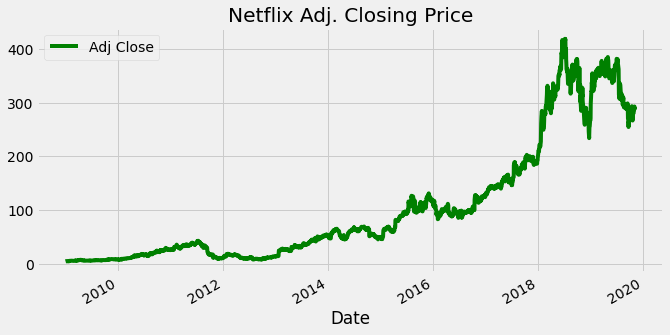

In [8]:
plt.style.use('fivethirtyeight')
df_nf.plot(title='Netflix Adj. Closing Price', figsize = (10,5), color = 'green')

plt.show()

<AxesSubplot:title={'center':'Netflix Cumulative Returns'}, xlabel='Date'>

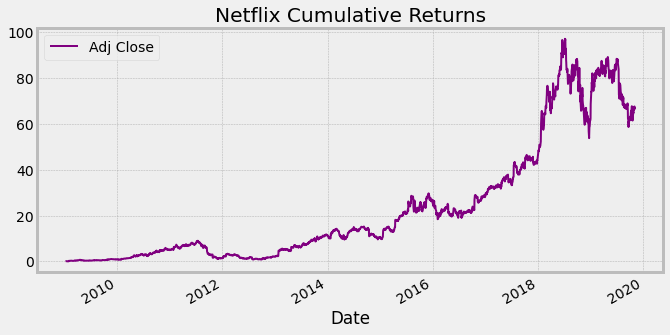

In [9]:
# Convert the adjusted closing prices to cumulative returns

# Take percentage change of stock price of Netflix
df_ret = df_nf.pct_change()
df_ret
#Calculate the cumulative product 
# In cumulative product, the length of returned series is same as input series and every element is equal
#to the product of current and all previous values

plt.style.use('bmh')
((1 + df_ret).cumprod() - 1).plot(title = 'Netflix Cumulative Returns', figsize = (10,5), color = 'purple')

<AxesSubplot:xlabel='Date'>

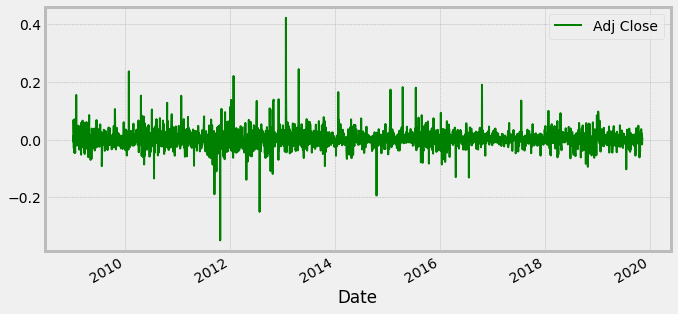

In [10]:
# Plot the returns which is the percentage change in adjusted closing price

plt.style.use('tableau-colorblind10')
df_nf.pct_change().plot(figsize=(10,5), color = 'green')

#### Getting data using an API key

In [11]:
# source: https://github.com/RomelTorres/alpha_vantage
# source: https://alpha-vantage.readthedocs.io/en/latest/
        
# You will need to obtain a new API key from Aplha Vantage

# In bash shell type command below:
#     pip install alpha_vantage

In [12]:
# Pull intraday data, example using Disney stock

# from alpha_vantage.timeseries import TimeSeries

#### Uploading data

In [13]:
# Google Trends website, search for terms Golf, Soccer, Tennis, Hockey and Baseball

sports = pd.read_csv('sports.csv', skiprows = 2)
df_sp = pd.DataFrame(sports)

col_names = ['Month','Golf','Soccer','Tennis','Hockey','Baseball']

df_sp.columns = col_names

df_sp.head()

Month  Golf  Soccer  Tennis  Hockey  Baseball
0  2004-01    45      21      14      22        24
1  2004-02    51      24      13      23        33
2  2004-03    64      28      16      23        45
3  2004-04    82      29      15      16        54
4  2004-05    83      32      17      14        54

In [14]:
df_sp.tail()

Month  Golf  Soccer  Tennis  Hockey  Baseball
198  2020-07    63      13      10       6        26
199  2020-08    64      15      11       9        24
200  2020-09    56      17      19       9        22
201  2020-10    42      17      11       7        23
202  2020-11    35      13       8       6        11

In [15]:
df_sp.isna().sum()

Month       0
Golf        0
Soccer      0
Tennis      0
Hockey      0
Baseball    0
dtype: int64

In [16]:
df_sp.set_index('Month', inplace = True)
df_sp.describe()

Golf      Soccer      Tennis      Hockey    Baseball
count  203.000000  203.000000  203.000000  203.000000  203.000000
mean    49.955665   28.512315   13.541872   14.753695   34.034483
std     18.358180    9.302060    4.140117    6.100513   14.378332
min     24.000000    9.000000    7.000000    5.000000   11.000000
25%     34.000000   23.000000   11.000000   10.000000   22.500000
50%     49.000000   28.000000   13.000000   15.000000   31.000000
75%     61.000000   32.000000   16.000000   18.000000   46.500000
max    100.000000   85.000000   27.000000   56.000000   64.000000

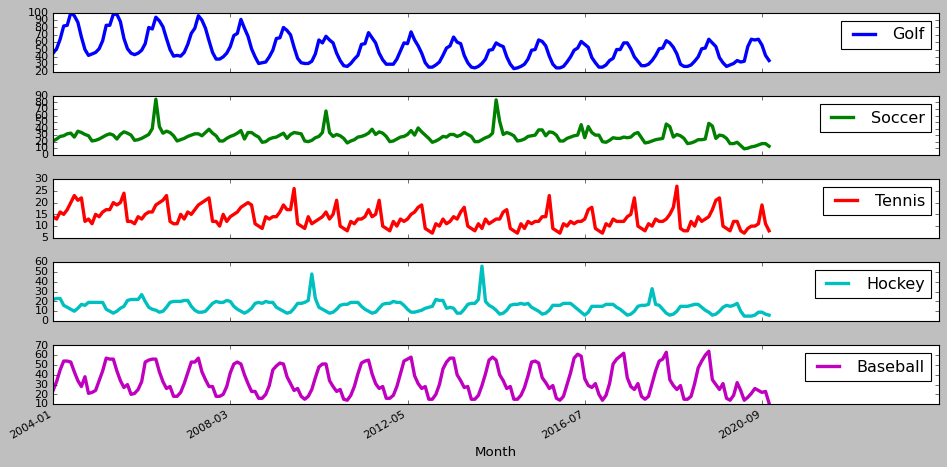

In [17]:
plt.style.use('classic')
df_sp.plot(figsize = (12,6), fontsize = 10, linewidth = 3, subplots = True)
plt.tight_layout()

### Time Series Data and Relationships

We will look at the following 5 datasets:

1. Google Trends. It's basically a term search count of the word "vacation".
2. Retail Furniture and furnishing sales data in millions of dollars. 
3. Adjusted clothes stock price for Bank of America. 
4. Adjusted clothes stock price for JP Morgan bank.
5. The monthly average temperature in Fahrenheit for St. Louis.

#### Example 1: Vacation dataset

In [18]:
vacation = pd.read_csv('vacation.csv',skiprows = 2)

df_v = pd.DataFrame(vacation)
# df_v.rename(columns = {'vacation: (United States)':'vacation'}, inplace = True)
col_names = ['month','num_search_vacation']
df_v.columns = col_names
df_v.head()

month  num_search_vacation
0  2004-01                   97
1  2004-02                   88
2  2004-03                   84
3  2004-04                   77
4  2004-05                   85

In [19]:
# Check for missing values
df_v.isna().sum()

month                  0
num_search_vacation    0
dtype: int64

In [20]:
from datetime import datetime

df_v['month'] = pd.to_datetime(df_v['month'])
df_v.set_index('month', inplace = True)

In [21]:
df_v.head(3)

num_search_vacation
month                          
2004-01-01                   97
2004-02-01                   88
2004-03-01                   84

In [22]:
# Provide the descriptive (summary) statistics
# Generate descriptive statistics that summarize the central tendency, dispersion and shape of the dataset's
# distribution, excluding NaN values.
# Percentile values (quantile, 1, 2, 3) on numeric values

df_v.describe()

num_search_vacation
count           203.000000
mean             57.793103
std              15.535541
min              26.000000
25%              49.000000
50%              55.000000
75%              68.000000
max             100.000000

In [23]:
# Calculate the median value (middle value), which is the 50th percentile value, quantile 2
# Mean > median implies that the data is right skewed
# Mean < median implies that the data is left skewed
df_v.median()

num_search_vacation    55.0
dtype: float64

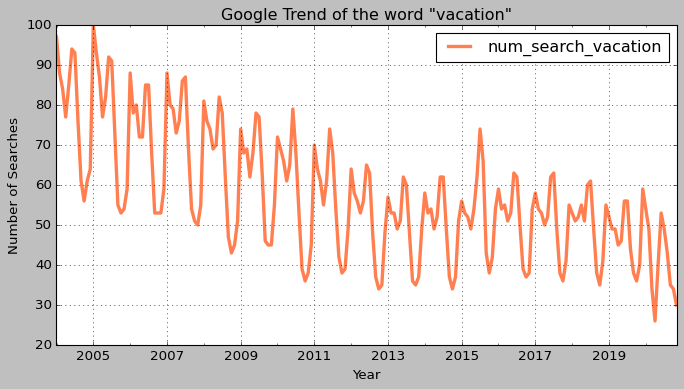

In [24]:
# Plot the time series of google searches of the word "vacation"

plt.style.use('seaborn-deep')

# #create Figure (empty Canvas)
# fig = plt.figure()

# # Add set of axes to the figure
# ax = fig.add_axes([0.1,0.1,0.8,0.9]) # left, bottom, width, height (range 0 to 1)

ax = df_v.plot(color = 'coral', grid = True, linewidth = 3, figsize=(10,5))

ax.set_xlabel('Year') # Notice the use of set_ to begin methods
ax.set_ylabel('Number of Searches')
ax.set_title('Google Trend of the word "vacation"')

plt.show()

Visually inspecting the time series above you can see that it trends downwards and then stabilizes around 2013. There is also periodic patterns or cycles with the low points in the search for the word "vacation", mostly occurring in October of each year, though occasionally it is in November as well. There's a notable spike in June 2015 with 75 counts of the search term "vacation". The grid lines help us to see that the pattern repeats every year.

In [25]:
# Check the options for fonts, lines, styles

print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


<AxesSubplot:ylabel='Frequency'>

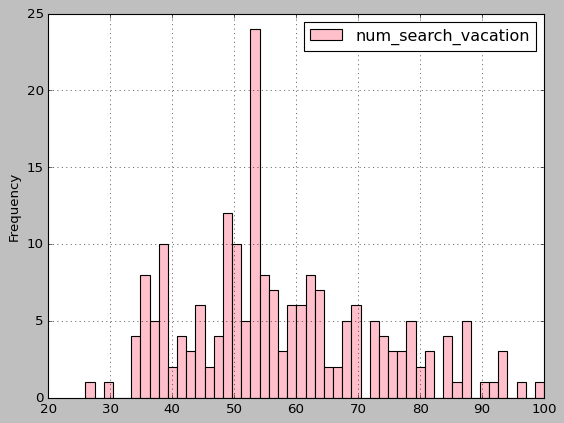

In [26]:
# Plot histogram (frequenct of counts), change num of bins to see different plots
df_v.plot(kind = 'hist', bins = 50, color = 'pink', grid = True)

<AxesSubplot:ylabel='Density'>

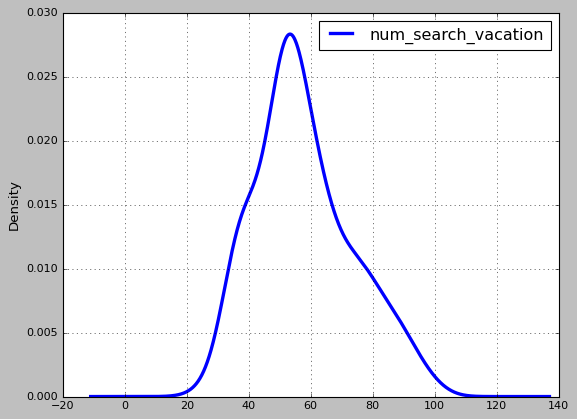

In [27]:
# Calculate Kernel Density Plot
# A density plot shows the distribution of the data over a continuous interval.
# Kernel Density Plot is a better way to display the distribution because it's not affected by the number of bins 
# used (each bar used in a typical histogram).

df_v.plot(kind = 'density', color = 'blue', grid = True, linewidth = 3, fontsize = 10)

#### Example 2: Furniture dataset

In [28]:
# Source: https://fred.stlouisfed.org/series/RSFHFSN
# Advance Retail Sales: Furniture and Home Furnishings Stores
# Units are in Millions of Dollars, not seasonally adjusted, prices
# Date period: 01.01.1992 to 01.09.2020

In [29]:
furniture = pd.read_csv('furniture.csv')
df_f = pd.DataFrame(furniture)

col_names = ['month','millions_of_dollars']
df_f.columns = col_names

df_f.head()

month  millions_of_dollars
0  1992-01-01                 3846
1  1992-02-01                 3908
2  1992-03-01                 4157
3  1992-04-01                 4141
4  1992-05-01                 4275

In [30]:
# Always check for null values
df_f.isna().sum()

month                  0
millions_of_dollars    0
dtype: int64

In [31]:
df_f.month = pd.to_datetime(df_f.month)

df_f.set_index('month', inplace = True)

In [32]:
df_f.head(2)

millions_of_dollars
month                          
1992-01-01                 3846
1992-02-01                 3908

In [33]:
df_f.describe()

millions_of_dollars
count           345.000000
mean           7624.579710
std            1709.347713
min            3846.000000
25%            6593.000000
50%            7685.000000
75%            8893.000000
max           11297.000000

Notice that the mean is 7624.5 and the median is 7685.0. The max value is 11297.0 and the min value is 3846.0.

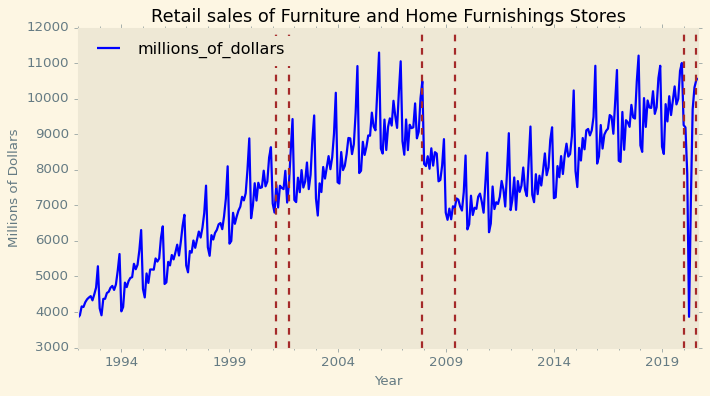

In [34]:
# Plot

plt.style.use('Solarize_Light2')

ax = df_f.plot(color = 'blue', grid = False, figsize=(10,5))

ax.set_xlabel('Year') # Notice the use of set_ to begin methods
ax.set_ylabel('Millions of Dollars')
ax.set_title('Retail sales of Furniture and Home Furnishings Stores')

# Add brown vertical line
ax.axvline('2001-03-01', color = 'brown', linestyle = '--')
ax.axvline('2001-10-01', color = 'brown', linestyle = '--')

ax.axvline('2007-12-01', color = 'brown', linestyle = '--')
ax.axvline('2009-06-01', color = 'brown', linestyle = '--')

ax.axvline('2020-01-01', color = 'brown', linestyle = '--')
ax.axvline('2020-08-01', color = 'brown', linestyle = '--')

These lines show the periods where there was a change in trend, and a quick look tells us these are the recession periods

<AxesSubplot:ylabel='Frequency'>

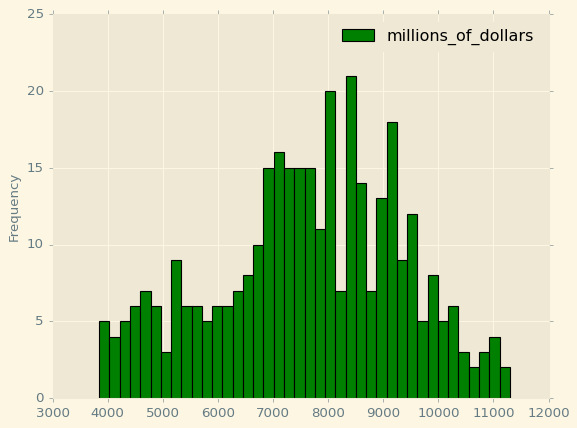

In [35]:
# Plot histogram (frequency of counts), change number of bins to see different plots

df_f.plot(kind = 'hist', bins = 40, color = 'green', grid = True)

# Frequency count of column 'millions_of_dollars'
# count = df_f['millions_of_dollars'].value_counts()
# print(count)

<AxesSubplot:ylabel='Density'>

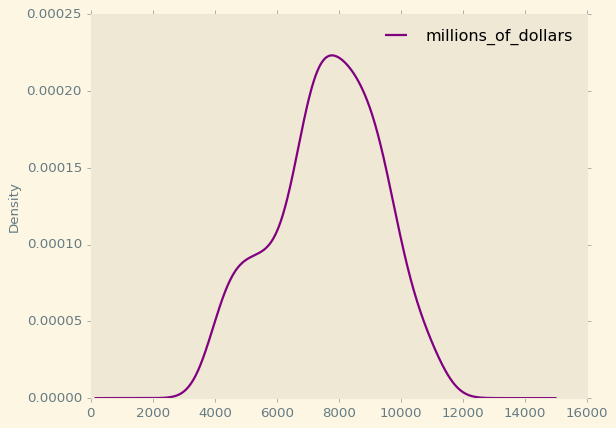

In [36]:
# Calculate KDP
# A density plot shows distribution of data over a continuous interval.
# KDP smoothes out the noise in time series data.
# The peaks of the density plot help display where values are concentrated over the interval.
# Kernel Density Plot is a better way to display the distribution because it's not affected by the number of bins 
# used (each bar used in a typical histogram).

df_f.plot(kind = 'kde', color = 'purple', grid = False)

##### Price Adjustment

In [37]:
# Source: https://fred.stlouisfed.org/series/CPIAUCSL
# Consumer Price Index: All Items in US City Average, All Urban Consumers (CPIAUCSL)
# Index 1982-1984 = 100, Seasonally Adjusted
# Date period: 01.01.1992 to 01.09.2020, monthly
# Unit is millions of dollards

In [38]:
cpi = pd.read_csv('cpi_index.csv')

df_cpi = pd.DataFrame(cpi)
col_names = ['date','cpi']
df_cpi.columns = col_names
df_cpi.head()

date    cpi
0  1992-01-01  138.3
1  1992-02-01  138.6
2  1992-03-01  139.1
3  1992-04-01  139.4
4  1992-05-01  139.7

In [39]:
df_cpi.tail()

date      cpi
341  2020-06-01  257.214
342  2020-07-01  258.723
343  2020-08-01  259.681
344  2020-09-01  260.209
345  2020-10-01  260.325

In [40]:
df_cpi.drop(df_cpi.tail(1).index,inplace=True)

cpi_list = df_cpi['cpi'].to_list()

In [41]:
df_f['cpi'] = cpi_list
df_f.head()

millions_of_dollars    cpi
month                                 
1992-01-01                 3846  138.3
1992-02-01                 3908  138.6
1992-03-01                 4157  139.1
1992-04-01                 4141  139.4
1992-05-01                 4275  139.7

In [42]:
# Store the last CPI value
sept2020_cpi = 260.209
sept2020_cpi

260.209

In [43]:
# Calculate the CPI for all months from 1992 to 2020 by dividing by the Sept 2020 CPI value

df_f['cpi_sept20_rate'] = df_f.cpi/sept2020_cpi
df_f.head()

millions_of_dollars    cpi  cpi_sept20_rate
month                                                  
1992-01-01                 3846  138.3         0.531496
1992-02-01                 3908  138.6         0.532649
1992-03-01                 4157  139.1         0.534570
1992-04-01                 4141  139.4         0.535723
1992-05-01                 4275  139.7         0.536876

In [44]:
# Calculate the furniture sales (millions of dollars) in terms of Spet 2020 dollars

df_f['furniture_price_adjusted'] = df_f['millions_of_dollars'] * df_f['cpi_sept20_rate']
df_f.head()

millions_of_dollars    cpi  cpi_sept20_rate  \
month                                                     
1992-01-01                 3846  138.3         0.531496   
1992-02-01                 3908  138.6         0.532649   
1992-03-01                 4157  139.1         0.534570   
1992-04-01                 4141  139.4         0.535723   
1992-05-01                 4275  139.7         0.536876   

            furniture_price_adjusted  
month                                 
1992-01-01               2044.132985  
1992-02-01               2081.591336  
1992-03-01               2222.208686  
1992-04-01               2218.429801  
1992-05-01               2295.145441

In [45]:
# Create a new Dataframe with the column that we want
df_f_adj = df_f[['furniture_price_adjusted']]
df_f_adj.head()

furniture_price_adjusted
month                               
1992-01-01               2044.132985
1992-02-01               2081.591336
1992-03-01               2222.208686
1992-04-01               2218.429801
1992-05-01               2295.145441

#### Example 3: Bank of America dataset

In [46]:
bac = data.DataReader("BAC",
                         start = '1990-1-1',
                         end = '2019-10-15',
                         data_source='yahoo')['Adj Close']

df_bac = pd.DataFrame(bac)

df_bac.reset_index(inplace = True)
df_bac['Date'] = pd.to_datetime(df_bac.Date)

df_bac.set_index('Date', inplace = True)
df_bac.head()

Adj Close
Date                 
1990-01-02   4.397493
1990-01-03   4.432862
1990-01-04   4.338544
1990-01-05   4.244228
1990-01-08   4.267807

<AxesSubplot:title={'center':'BOA Adj. Closing Price'}, xlabel='Date'>

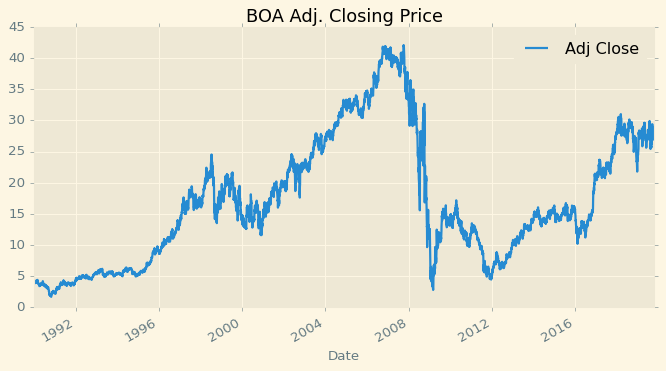

In [47]:
df_bac.plot(title = 'BOA Adj. Closing Price', figsize = (10,5))

In [48]:
df_bac.isna().sum()

Adj Close    0
dtype: int64

In [49]:
df_bac.describe()

Adj Close
count  7506.000000
mean     17.014236
std      10.087710
min       1.648861
25%       8.781196
50%      15.078421
75%      23.801026
max      42.099216

In [50]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


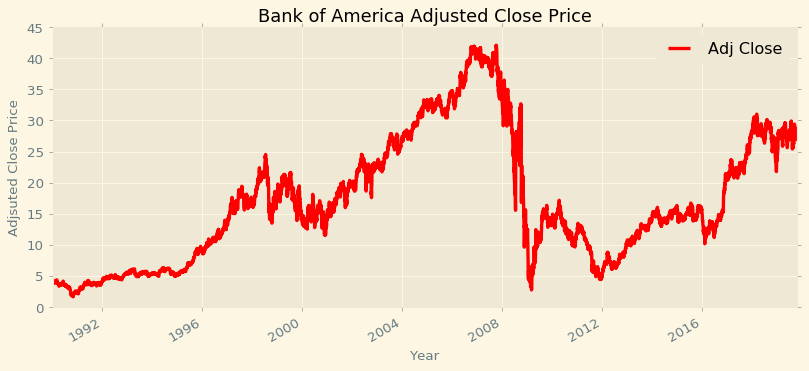

In [51]:
plt.style.use('_classic_test_patch')

ax = df_bac.plot(color = 'red', grid = True, figsize = (12,5), linewidth = 3)

ax.set_xlabel('Year')
ax.set_ylabel('Adjsuted Close Price')
ax.set_title('Bank of America Adjusted Close Price')

plt.show()

<AxesSubplot:ylabel='Frequency'>

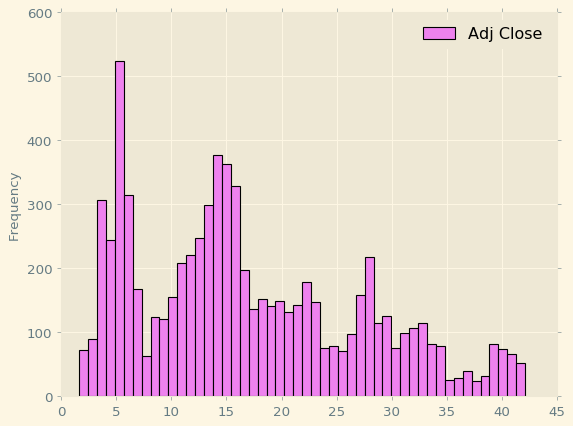

In [52]:
df_bac.plot(kind = 'hist', bins = 50, color = 'violet', grid = True)

<AxesSubplot:ylabel='Density'>

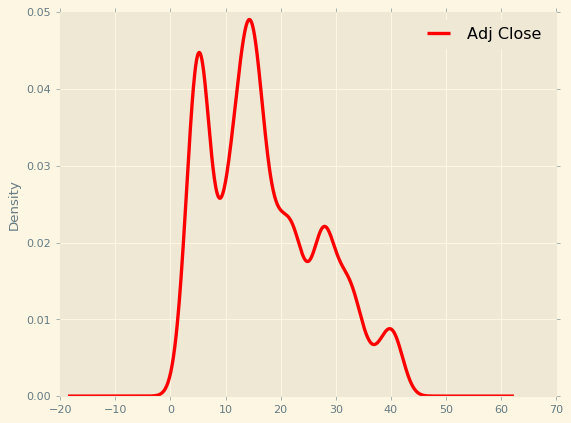

In [53]:
df_bac.plot(kind = 'kde', color = 'red', grid = True, linewidth = 3, fontsize = 10)

#### Example 4: J.P. Morgan dataset

In [54]:
jpm = data.DataReader("JPM",
                         start = '1990-1-1',
                         end = '2019-10-15',
                         data_source='yahoo')['Adj Close']

df_jpm = pd.DataFrame(jpm)

df_jpm.reset_index(inplace = True)
df_jpm['Date'] = pd.to_datetime(df_jpm.Date)

df_jpm.set_index('Date', inplace = True)
df_jpm.head()

Adj Close
Date                 
1990-01-02   3.483539
1990-01-03   3.599656
1990-01-04   3.614169
1990-01-05   3.628687
1990-01-08   3.628687

<AxesSubplot:title={'center':'JP Morgan Adjusted Closing Price'}, xlabel='Date'>

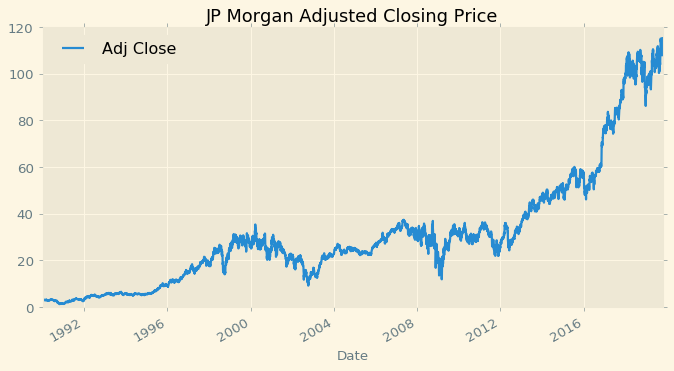

In [55]:
df_jpm.plot(title = 'JP Morgan Adjusted Closing Price', figsize = (10,5))

In [56]:
df_jpm.isna().sum()

Adj Close    0
dtype: int64

In [57]:
df_jpm.describe()

Adj Close
count  7506.000000
mean     31.049650
std      25.494329
min       1.272944
25%      14.569731
50%      26.003755
75%      34.639580
max     115.756325

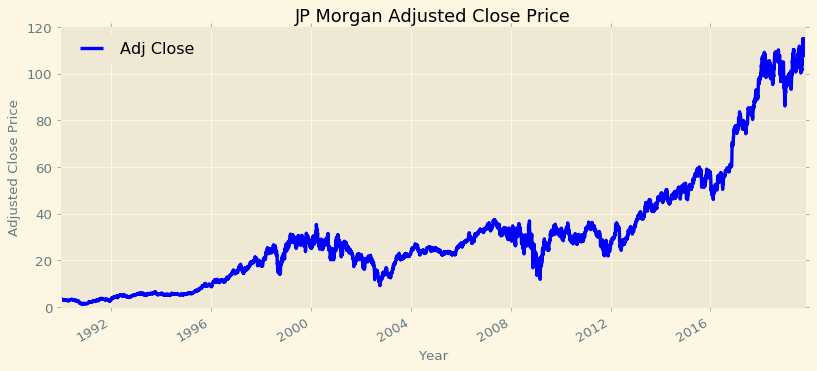

In [58]:
plt.style.use('tableau-colorblind10')

ax = df_jpm.plot(color = 'blue', grid = True, figsize = (12,5), linewidth = 3)

ax.set_xlabel('Year')
ax.set_ylabel('Adjusted Close Price')
ax.set_title('JP Morgan Adjusted Close Price')

plt.show()

<AxesSubplot:ylabel='Frequency'>

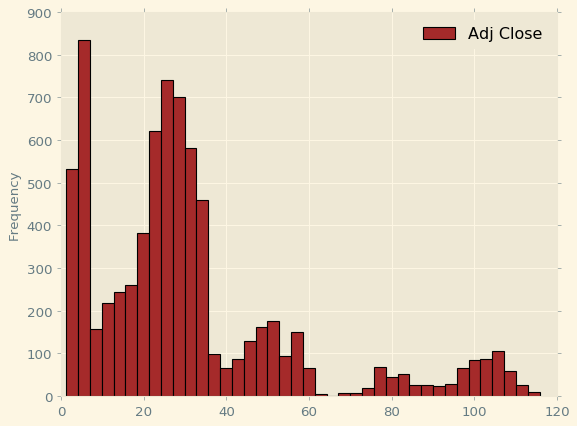

In [59]:
df_jpm.plot(kind = 'hist', bins = 40, color = 'brown', grid = True)

<AxesSubplot:ylabel='Density'>

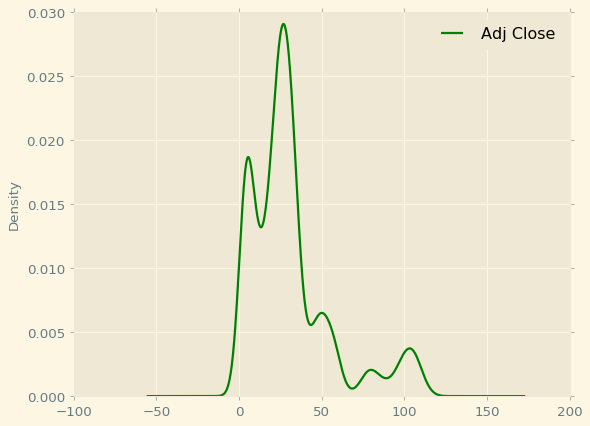

In [60]:
df_jpm.plot(kind = 'density', color = 'green', grid = True)

#### Example 5: Average Temperature dataset

In [61]:
# Source: national Centerse for Environmental Information, National Oceanic and Atmospheric Administraion
# Source: https://www.ncdc.noaa.gov/cag/city/time-series/USW00013994/tavg/all/1/1930-2019?
# Average temperatures, all months, Saint Louis, Missouri, 1938-04 to 2019-01
# Anomaly: Departure from mean relative to the month (1938-2000) base period, Missing value is -99.0

In [62]:
temp = pd.read_csv('temperatures.csv', skiprows = 4, infer_datetime_format = True)

df_t = pd.DataFrame(temp)
col_names = ['date','avg_temp','anomaly']
df_t.columns = col_names

df_t.head()

date  avg_temp  anomaly
0  193804      56.6      0.0
1  193805      64.9     -1.4
2  193806      73.5     -2.1
3  193807      80.5      0.9
4  193808      81.3      3.4

In [63]:
idx_pos = df_t.query('avg_temp == -99.0')
idx_pos

date  avg_temp  anomaly
899  201303     -99.0   -143.8

In [64]:
df_t['avg_temp'].loc[898,]

35.1

In [65]:
df_t['avg_temp'].loc[900,]

54.9

In [66]:
new_avg_val = (df_t['avg_temp'].loc[898,] + df_t['avg_temp'].loc[900,]) / 2
new_avg_val

45.0

In [67]:
# let's first put NaN isntead of -99.0
df_t.at[899,'avg_temp'] = np.nan
df_t['avg_temp'].loc[899,]

nan

In [68]:
df_t.isna().sum()

date        0
avg_temp    1
anomaly     0
dtype: int64

In [69]:
# Lets use interpolation method to put a value in the NaN's place
df_t = df_t.interpolate(method = 'linear', limit_direction = 'forward')

# Check the value where the previous NaN originally coded as -99.0 was at
df_t['avg_temp'].loc[899,]

45.0

In [70]:
df_t.head()

date  avg_temp  anomaly
0  193804      56.6      0.0
1  193805      64.9     -1.4
2  193806      73.5     -2.1
3  193807      80.5      0.9
4  193808      81.3      3.4

In [71]:
df_t['date'] = pd.to_datetime(df_t['date'], format = '%Y%m')

In [72]:
df_t.head()

date  avg_temp  anomaly
0 1938-04-01      56.6      0.0
1 1938-05-01      64.9     -1.4
2 1938-06-01      73.5     -2.1
3 1938-07-01      80.5      0.9
4 1938-08-01      81.3      3.4

In [73]:
df_t.describe()

avg_temp     anomaly
count  970.000000  970.000000
mean    56.307732   -0.141134
std     17.527659    5.947501
min     13.900000 -143.800000
25%     40.300000   -2.200000
50%     58.250000    0.000000
75%     73.100000    2.400000
max     87.500000   15.800000

In [74]:
# Subset the column of interest
df_at = df_t[['avg_temp']]
df_at.head()

avg_temp
0      56.6
1      64.9
2      73.5
3      80.5
4      81.3

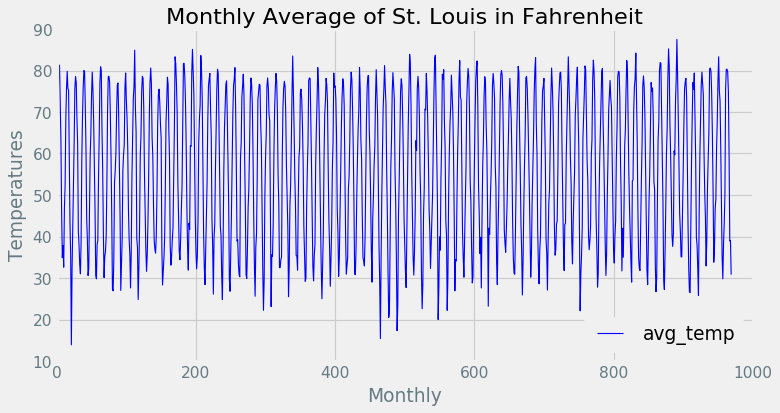

In [75]:
# Plot time series for the column of interest

plt.style.use('fivethirtyeight')

ax = df_at.plot(color = 'blue', grid = True, figsize = (10,5), linewidth = 1)

ax.set_xlabel('Monthly')
ax.set_ylabel('Temperatures')
ax.set_title('Monthly Average of St. Louis in Fahrenheit')

plt.show()

<AxesSubplot:ylabel='Frequency'>

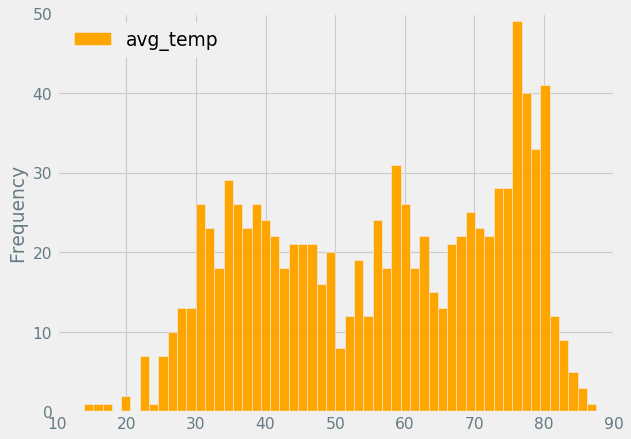

In [76]:
df_at.plot(kind = 'hist', bins = 55, color = 'orange', grid = True)

<AxesSubplot:ylabel='Density'>

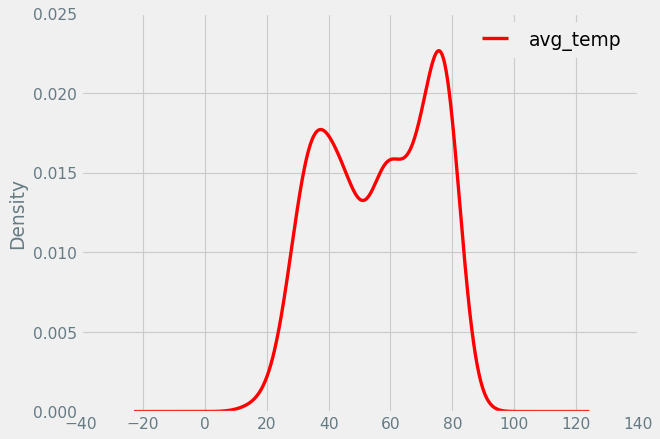

In [77]:
df_at.plot(kind = 'density', color = 'red', grid = True, linewidth = 3)

### Modelling and Decomposing Time Series Based on Trend and Seasonality

We will focus specifically on:
1. Components of a time series. We'll talk about trend, seasonality, and noise
2. Modelling time series (additive and multiplicative) 
3. Decomposing time series

Components of a Time Series:
A time series is composed of mainly trend, seasonality and noise. We will take a look at the component parts of time series, focusing on automated decomposition methods. This will give us some intuition about the components of time series.

*Trend*
When we talk about trend, we are talking about how the series data increases or decreases over time. Is it moving higher or lower over the time frame? The series is either uptrend or downtrend, both of which are non-stationary.

*Seasonality*
Seasonality refers to a repeating periodic or cyclical pattern with regular itnervals within series. The pattern is within a fixed time period and it repeats itself at regular intervals. There can be upward or downward swings but it continues to repeat over a fixed period of time as in cycle. Cycicality could repeat but it has no fixed point.

*Noise*
In general, noise captures the irregularities or random variation in the series. It can have erratic events or simple random variation. It has a short duration. It is hard to predict due to its erratic occurrence.

*Additive Model*: An additive model is linear. y(t) = Level + Trend + Seasonality + Noise. 
It is useful when the variations around the trend do not vary with the level of the time series. Components are added together.


*Multiplicative Model*: A multiplicative model is a non-linear: y(t) = Level * Trend * Seasonality * Noise. 
A non-linear seasonality has an increasing or decreasing frequency and/or amplitude over time. It is useful when the trend is proportional to the level of the time series. Components are multiplied together.

#### Decomposing Time Series

##### Application of Addictive Model

In [78]:
# Example 1: Google trends, numbers of searches of the word "vacation", time series shows seasonality 

from statsmodels.tsa.seasonal import seasonal_decompose

ts1 = df_v['num_search_vacation']
# freq is the number of data points in a repeated cycle
result = seasonal_decompose(ts1, model = 'additive', period = 12)

print(result.trend)
print(result.seasonal)
print(result.resid) 
print(result.observed)

month
2004-01-01   NaN
2004-02-01   NaN
2004-03-01   NaN
2004-04-01   NaN
2004-05-01   NaN
              ..
2020-07-01   NaN
2020-08-01   NaN
2020-09-01   NaN
2020-10-01   NaN
2020-11-01   NaN
Name: trend, Length: 203, dtype: float64
month
2004-01-01    10.572786
2004-02-01     5.648307
2004-03-01     4.051953
2004-04-01    -0.698047
2004-05-01     2.752474
                ...    
2020-07-01    13.169141
2020-08-01    -0.804818
2020-09-01   -14.198047
2020-10-01   -16.622526
2020-11-01   -14.122526
Name: seasonal, Length: 203, dtype: float64
month
2004-01-01   NaN
2004-02-01   NaN
2004-03-01   NaN
2004-04-01   NaN
2004-05-01   NaN
              ..
2020-07-01   NaN
2020-08-01   NaN
2020-09-01   NaN
2020-10-01   NaN
2020-11-01   NaN
Name: resid, Length: 203, dtype: float64
month
2004-01-01    97.0
2004-02-01    88.0
2004-03-01    84.0
2004-04-01    77.0
2004-05-01    85.0
              ... 
2020-07-01    49.0
2020-08-01    43.0
2020-09-01    35.0
2020-10-01    34.0
2020-11-01    30.0
Nam

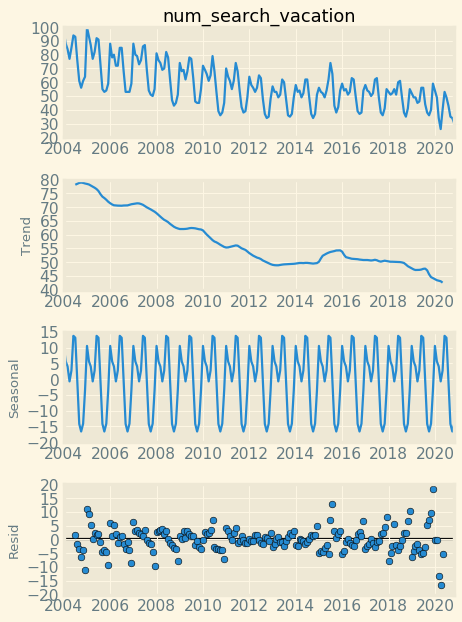

In [79]:
# Example 1: Google trends, numbers of searches of the word "vacation", time series shows seasonality 
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

rcParams['figure.figsize'] = 6,8
plt.style.use('Solarize_Light2')

ts1 = df_v['num_search_vacation']
# freq is the number of data points in a repeated cycle
result = seasonal_decompose(ts1, model = 'additive', period = 12)
result.plot()
plt.tight_layout()
plt.show()

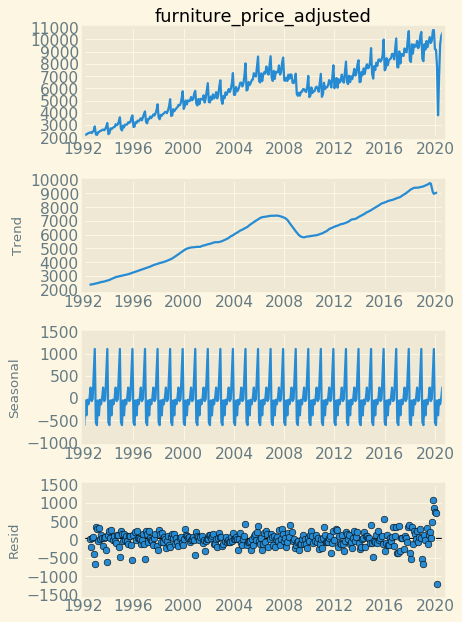

In [80]:
# Example 2: Furniture sales in Millions of Dollars (adjusted to July 2019 prices)
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

rcParams['figure.figsize'] = 6,8
plt.style.use('Solarize_Light2')

ts2 = df_f['furniture_price_adjusted']
# freq is the number of data points in a repeated cycle
result = seasonal_decompose(ts2, model = 'additive', period = 12)
result.plot()
plt.tight_layout()
plt.show()

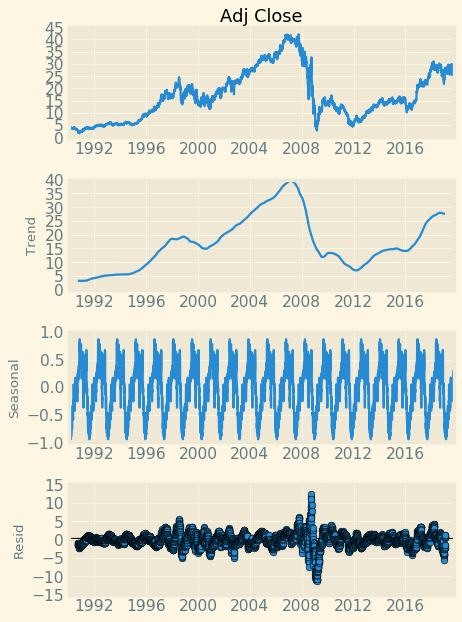

In [81]:
# Example 3: Adjusted Close Price of Bank of America
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

rcParams['figure.figsize'] = 6,8
plt.style.use('Solarize_Light2')

ts3 = df_bac['Adj Close']
# freq is the number of data points in a repeated cycle
result = seasonal_decompose(ts3, model = 'additive', period = 365)
result.plot()
plt.tight_layout()
plt.show()

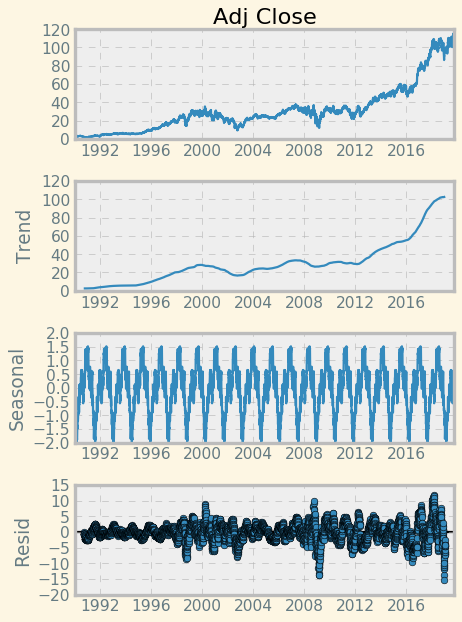

In [82]:
# Example 4: Adjusted Closed Price for JP Morgan
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

rcParams['figure.figsize'] = 6,8
plt.style.use('bmh')

ts4 = df_jpm['Adj Close']
# freq is the number of data points in a repeated cycle
result = seasonal_decompose(ts4, model = 'additive', period = 365)
result.plot()
plt.tight_layout()
plt.show()

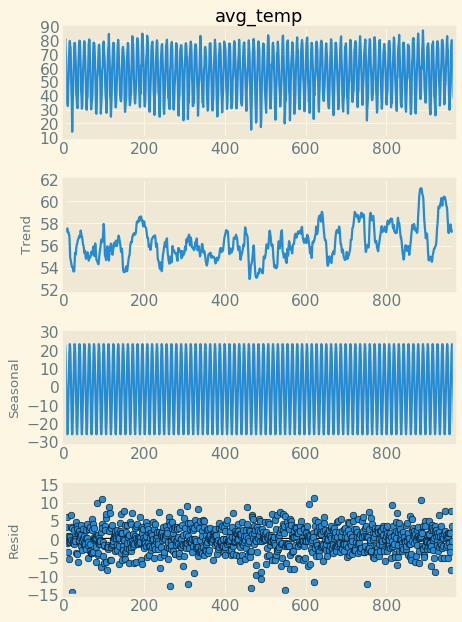

In [83]:
# Example 5: Average Temperature of St. Louis
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

rcParams['figure.figsize'] = 6,8
plt.style.use('Solarize_Light2')

ts5 = df_t['avg_temp']
# freq is the number of data points in a repeated cycle
result = seasonal_decompose(ts5, model = 'additive', period = 12)
result.plot()
plt.tight_layout()
plt.show()

##### Application of Multiplicative Model

In [84]:
# Example 1: Google trends, numbers of searches of the word "vacation", time series shows seasonality 

from statsmodels.tsa.seasonal import seasonal_decompose

ts1 = df_v['num_search_vacation']
# freq is the number of data points in a repeated cycle
result = seasonal_decompose(ts1, model = 'multiplicative', period = 12)

print(result.trend)
print(result.seasonal)
print(result.resid) 
print(result.observed)

month
2004-01-01   NaN
2004-02-01   NaN
2004-03-01   NaN
2004-04-01   NaN
2004-05-01   NaN
              ..
2020-07-01   NaN
2020-08-01   NaN
2020-09-01   NaN
2020-10-01   NaN
2020-11-01   NaN
Name: trend, Length: 203, dtype: float64
month
2004-01-01    1.178802
2004-02-01    1.094083
2004-03-01    1.062842
2004-04-01    0.980448
2004-05-01    1.044965
                ...   
2020-07-01    1.226654
2020-08-01    0.986816
2020-09-01    0.755977
2020-10-01    0.712376
2020-11-01    0.758007
Name: seasonal, Length: 203, dtype: float64
month
2004-01-01   NaN
2004-02-01   NaN
2004-03-01   NaN
2004-04-01   NaN
2004-05-01   NaN
              ..
2020-07-01   NaN
2020-08-01   NaN
2020-09-01   NaN
2020-10-01   NaN
2020-11-01   NaN
Name: resid, Length: 203, dtype: float64
month
2004-01-01    97.0
2004-02-01    88.0
2004-03-01    84.0
2004-04-01    77.0
2004-05-01    85.0
              ... 
2020-07-01    49.0
2020-08-01    43.0
2020-09-01    35.0
2020-10-01    34.0
2020-11-01    30.0
Name: num_sear

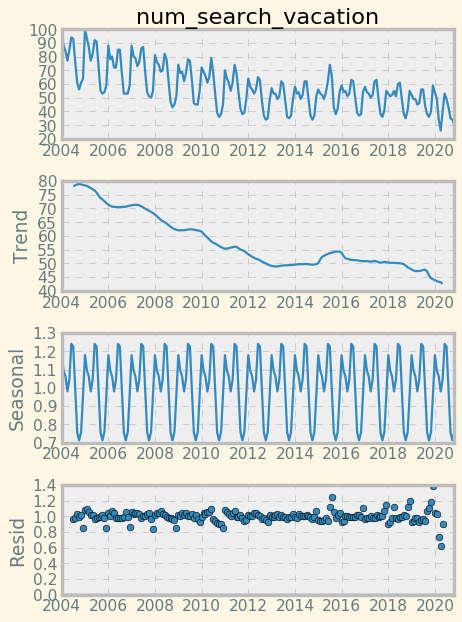

In [85]:
# Example 1: Google trends, numbers of searches of the word "vacation", time series shows seasonality 
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

rcParams['figure.figsize'] = 6,8
plt.style.use('bmh')

ts1 = df_v['num_search_vacation']
# freq is the number of data points in a repeated cycle
result = seasonal_decompose(ts1, model = 'multiplicative', period = 12)
result.plot()
plt.tight_layout()
plt.show()

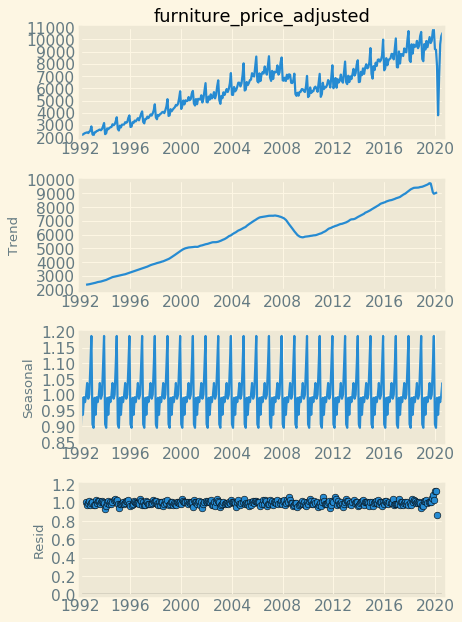

In [86]:
# Example 2: Furniture sales in Millions of Dollars (adjusted to July 2019 prices)
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

rcParams['figure.figsize'] = 6,8
plt.style.use('Solarize_Light2')

ts2 = df_f['furniture_price_adjusted']
# freq is the number of data points in a repeated cycle
result = seasonal_decompose(ts2, model = 'multiplicative', period = 12)
result.plot()
plt.tight_layout()
plt.show()

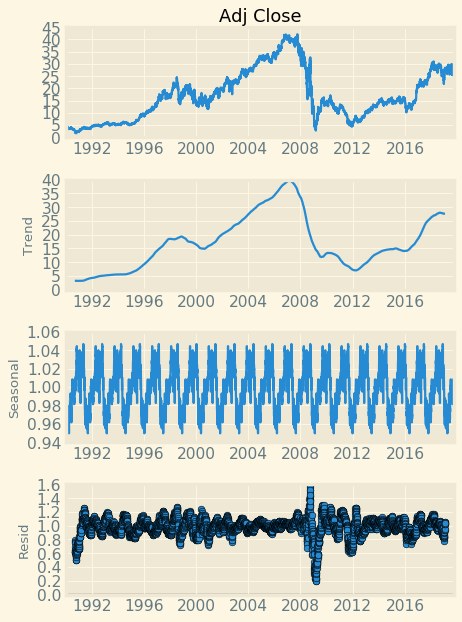

In [87]:
# Example 3: Adjusted Close Price of Bank of America
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

rcParams['figure.figsize'] = 6,8
plt.style.use('Solarize_Light2')

ts3 = df_bac['Adj Close']
# freq is the number of data points in a repeated cycle
result = seasonal_decompose(ts3, model = 'multiplicative', period = 365)
result.plot()
plt.tight_layout()
plt.show()

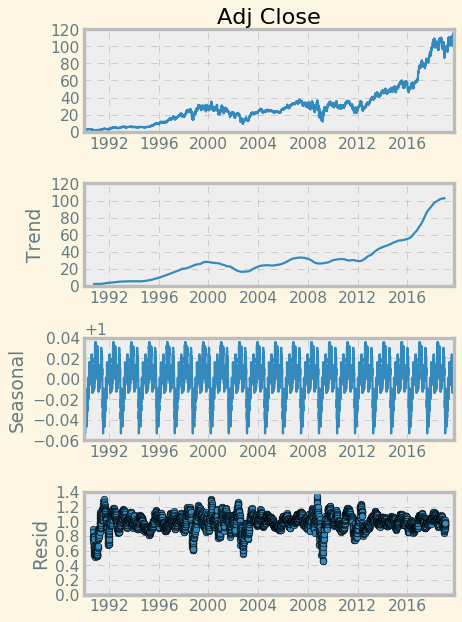

In [88]:
# Example 4: Adjusted Closed Price for JP Morgan
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

rcParams['figure.figsize'] = 6,8
plt.style.use('bmh')

ts4 = df_jpm['Adj Close']
# freq is the number of data points in a repeated cycle
result = seasonal_decompose(ts4, model = 'multiplicative', period = 365)
result.plot()
plt.tight_layout()
plt.show()

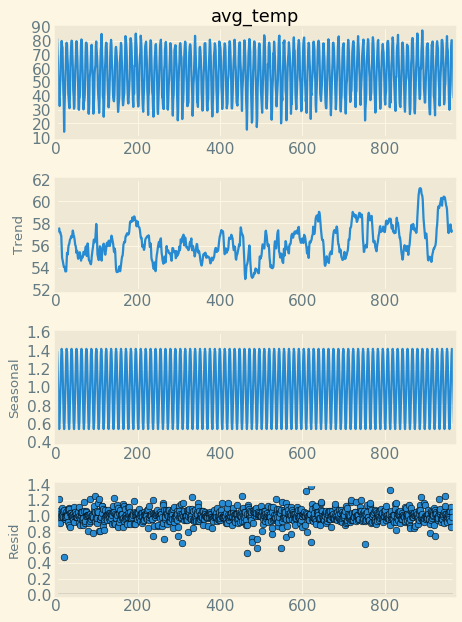

In [89]:
# Example 5: Average Temperature of St. Louis
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

rcParams['figure.figsize'] = 6,8
plt.style.use('Solarize_Light2')

ts5 = df_t['avg_temp']
# freq is the number of data points in a repeated cycle
result = seasonal_decompose(ts5, model = 'multiplicative', period = 12)
result.plot()
plt.tight_layout()
plt.show()

### Approaches to Detrend and Deseasonalize a Time Series

1. Differencing (first difference, second difference, and substraction from the mean value)
2. Change in Percentage - typically called return with stock price data
3. Transformation (log transformation)- if you have a range of data that takes on many different values and the values themselves are big, a log transformation might be a good idea

When detrending and/or deseasonising a time series you may use one or a combination of approaches such as differencing, subtracting from the mean (or from a mean over a period), calculating percentage change, or using a transformation such as a log transformation. For instance, you make the first difference and then a log transformation or you may use a second difference. As you perform various operations (first dfference, second difference, subtracting the mean, log transformation, percentage), you will gain some intuition about how your data is being altered.

It is not always necessary to detrend and deseasonalise. Be aware that this may or may not apply to your particular data or domain. At times, you can work with the original data as it is.

#### Differencing

Differencing can help to reduce trend and seasonality. You can difference your data by substraction. You subtract away the previous period from the current period. Below you will see that the first observation has a NaN because there was no previous period.

In [90]:
# Google trends pn a search term "vacation" from 2004 to 2020
df_v.head()

num_search_vacation
month                          
2004-01-01                   97
2004-02-01                   88
2004-03-01                   84
2004-04-01                   77
2004-05-01                   85

In [91]:
# Example of first differencing
df_v['first_diff'] = df_v['num_search_vacation'].diff()

df_v.head()

num_search_vacation  first_diff
month                                      
2004-01-01                   97         NaN
2004-02-01                   88        -9.0
2004-03-01                   84        -4.0
2004-04-01                   77        -7.0
2004-05-01                   85         8.0

In [92]:
# Drop the NaN values

df_v.dropna(inplace = True)

In [93]:
df_v.describe()

num_search_vacation  first_diff
count           202.000000  202.000000
mean             57.599010   -0.331683
std              15.325412    9.657513
min              26.000000  -23.000000
25%              49.000000   -6.000000
50%              54.500000   -1.000000
75%              68.000000    5.000000
max             100.000000   36.000000

In [94]:
# Example of second differencing

df_v['second_diff'] = df_v['num_search_vacation'].diff(2)
df_v.dropna(inplace = True)
df_v.describe()

num_search_vacation  first_diff  second_diff
count           200.000000  200.000000   200.000000
mean             57.315000   -0.270000    -0.540000
std              15.132772    9.682762    15.334737
min              26.000000  -23.000000   -36.000000
25%              48.750000   -6.000000   -11.250000
50%              54.000000   -1.000000    -1.000000
75%              66.500000    5.000000    11.000000
max             100.000000   36.000000    39.000000

Comparing the mean and std deviation between the first and second difference, the first difference gives better results and should be sufficient to detrend and deseasonilise the series.

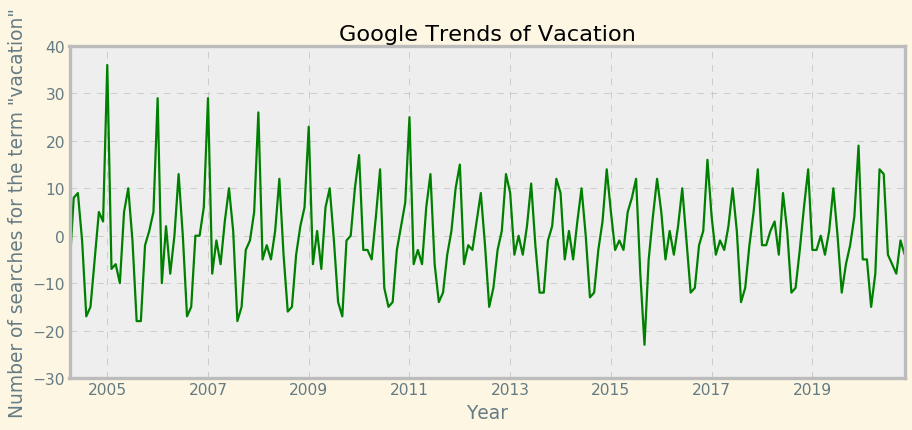

In [95]:
# Plot the time series

plt.style.use('bmh')

ax = df_v['first_diff'].plot(color = 'green', grid = True, figsize = (12,5), linewidth = 2)

ax.set_xlabel('Year')
ax.set_ylabel('Number of searches for the term "vacation"')
ax.set_title('Google Trends of Vacation')

plt.show()

<AxesSubplot:ylabel='Density'>

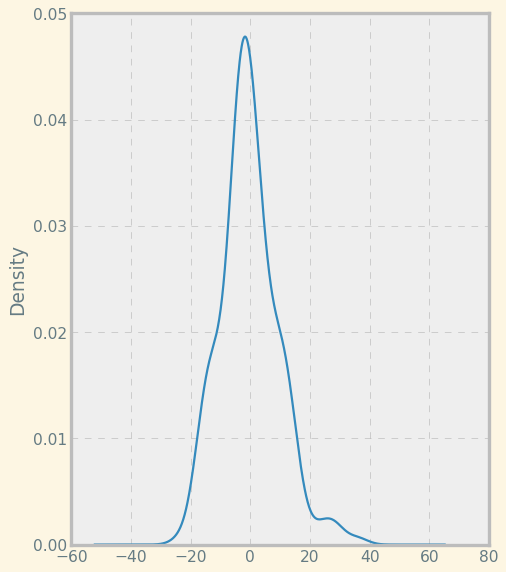

In [96]:
# Plot Kernel Density Plot

df_v['first_diff'].plot(kind = 'kde')

##### Examples of Subtraction from Mean

You can difference your data by subtraction. You subtract away the previous period from the current period. Below you will see that the first observation has an NaN because there was no previous period.

In [97]:
# Average Temperature of St. Louis
df_t.head()

date  avg_temp  anomaly
0 1938-04-01      56.6      0.0
1 1938-05-01      64.9     -1.4
2 1938-06-01      73.5     -2.1
3 1938-07-01      80.5      0.9
4 1938-08-01      81.3      3.4

In [98]:
df_t['mean_diff'] = df_t['avg_temp'] - df_t['avg_temp'].mean()
df_t.head()

date  avg_temp  anomaly  mean_diff
0 1938-04-01      56.6      0.0   0.292268
1 1938-05-01      64.9     -1.4   8.592268
2 1938-06-01      73.5     -2.1  17.192268
3 1938-07-01      80.5      0.9  24.192268
4 1938-08-01      81.3      3.4  24.992268

In [99]:
df_t.describe()

avg_temp     anomaly     mean_diff
count  970.000000  970.000000  9.700000e+02
mean    56.307732   -0.141134  2.889418e-14
std     17.527659    5.947501  1.752766e+01
min     13.900000 -143.800000 -4.240773e+01
25%     40.300000   -2.200000 -1.600773e+01
50%     58.250000    0.000000  1.942268e+00
75%     73.100000    2.400000  1.679227e+01
max     87.500000   15.800000  3.119227e+01

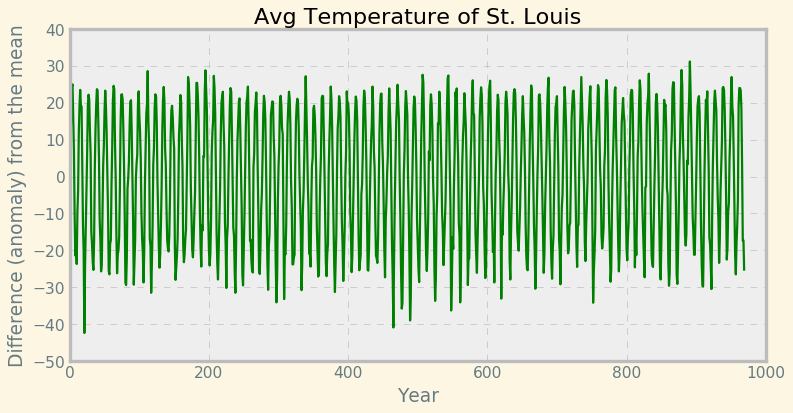

In [100]:
# Plot the series
plt.style.use('bmh')

ax = df_t['mean_diff'].plot(color = 'green', grid = True, figsize = (10,5))
ax.set_xlabel('Year')
ax.set_ylabel('Difference (anomaly) from the mean')
ax.set_title('Avg Temperature of St. Louis')

plt.show()

<AxesSubplot:ylabel='Density'>

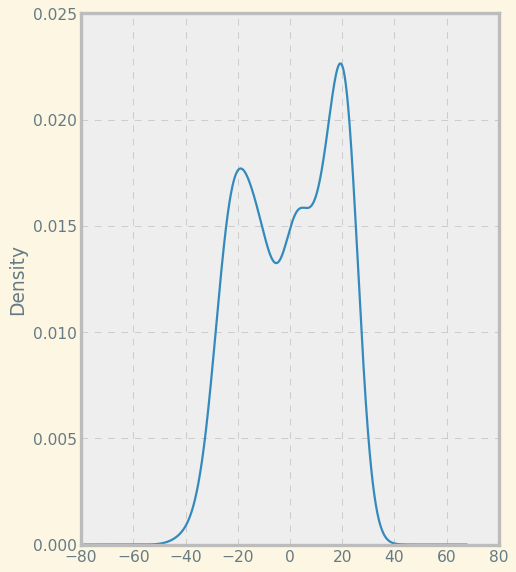

In [101]:
df_t['mean_diff'].plot(kind = 'density', grid = True, linewidth = 2)

#### Percentage Change

##### Furniture example

In [102]:
# Furniture sales in Millions of Dollars (adjusted to September 2020 prices)

df_f.head()

millions_of_dollars    cpi  cpi_sept20_rate  \
month                                                     
1992-01-01                 3846  138.3         0.531496   
1992-02-01                 3908  138.6         0.532649   
1992-03-01                 4157  139.1         0.534570   
1992-04-01                 4141  139.4         0.535723   
1992-05-01                 4275  139.7         0.536876   

            furniture_price_adjusted  
month                                 
1992-01-01               2044.132985  
1992-02-01               2081.591336  
1992-03-01               2222.208686  
1992-04-01               2218.429801  
1992-05-01               2295.145441

In [103]:
df_f['furniture_pct_change'] = df_f['furniture_price_adjusted'].pct_change()
df_f.head()

millions_of_dollars    cpi  cpi_sept20_rate  \
month                                                     
1992-01-01                 3846  138.3         0.531496   
1992-02-01                 3908  138.6         0.532649   
1992-03-01                 4157  139.1         0.534570   
1992-04-01                 4141  139.4         0.535723   
1992-05-01                 4275  139.7         0.536876   

            furniture_price_adjusted  furniture_pct_change  
month                                                       
1992-01-01               2044.132985                   NaN  
1992-02-01               2081.591336              0.018325  
1992-03-01               2222.208686              0.067553  
1992-04-01               2218.429801             -0.001701  
1992-05-01               2295.145441              0.034581

In [104]:
df_f.dropna(inplace = True)

In [105]:
df_f.describe()

millions_of_dollars         cpi  cpi_sept20_rate  \
count           344.000000  344.000000       344.000000   
mean           7635.563953  199.589459         0.767035   
std            1699.600343   36.150847         0.138930   
min            3865.000000  138.600000         0.532649   
25%            6604.250000  165.625000         0.636508   
50%            7698.500000  201.550000         0.774570   
75%            8893.500000  233.066750         0.895691   
max           11297.000000  260.209000         1.000000   

       furniture_price_adjusted  furniture_pct_change  
count                344.000000            344.000000  
mean                6029.922755              0.010998  
std                 2149.451999              0.109829  
min                 2081.591336             -0.513479  
25%                 4314.255272             -0.032457  
50%                 6116.502919              0.023095  
75%                 7438.823489              0.074349  
max                10928.366552              0.845346

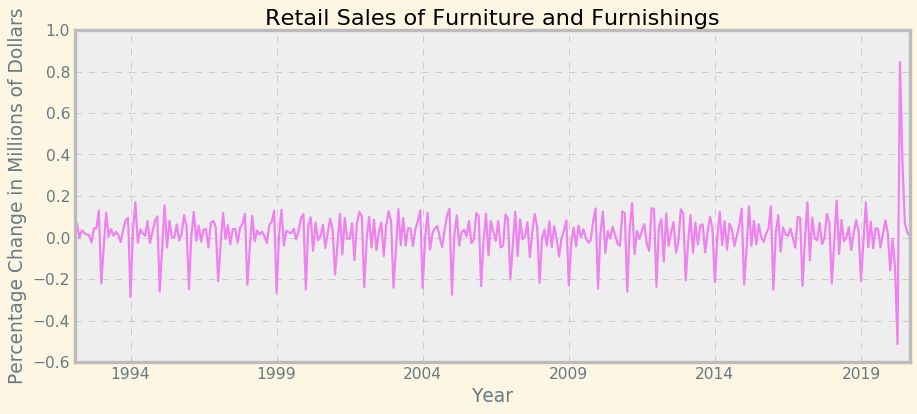

In [106]:
# Plot the time series

plt.style.use('bmh')

ax = df_f['furniture_pct_change'].plot(color = 'violet', grid = True, figsize = (12,5), linewidth = 2)

ax.set_xlabel('Year')
ax.set_ylabel('Percentage Change in Millions of Dollars')
ax.set_title('Retail Sales of Furniture and Furnishings')

plt.show()

<AxesSubplot:ylabel='Density'>

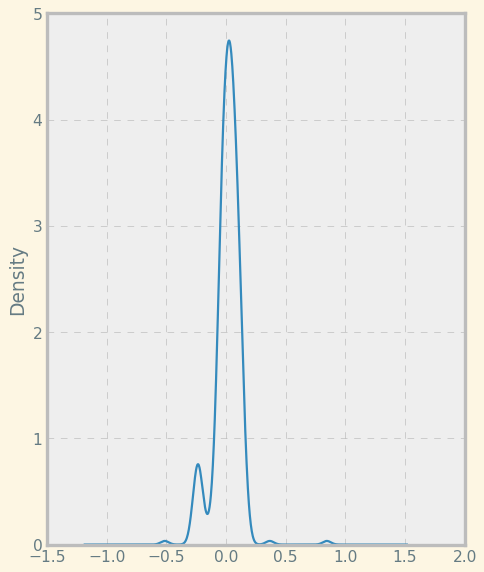

In [107]:
df_f['furniture_pct_change'].plot(kind = 'kde')

##### Bank of America example

In [108]:
# Another example of pct change for adjusted close stock price
# Bank of America example

df_bac.head()

Adj Close
Date                 
1990-01-02   4.397493
1990-01-03   4.432862
1990-01-04   4.338544
1990-01-05   4.244228
1990-01-08   4.267807

In [109]:
# Convert daily data to weekly data

df_bac = df_bac.resample(rule = 'W').last()

# rule is weekly
# last means the last day of the week

In [110]:
df_bac['pct_change'] = df_bac['Adj Close'].pct_change()

In [111]:
df_bac.dropna(inplace = True)
df_bac.head()

Adj Close  pct_change
Date                             
1990-01-14   4.032017   -0.050000
1990-01-21   4.173489    0.035087
1990-01-28   4.055598   -0.028248
1990-02-04   4.043808   -0.002907
1990-02-11   3.973068   -0.017493

In [112]:
df_bac.describe()

Adj Close   pct_change
count  1554.000000  1554.000000
mean     17.042804     0.002843
std      10.091480     0.057800
min       1.733730    -0.447267
25%       8.794502    -0.021539
50%      15.058882     0.002572
75%      24.000775     0.025267
max      42.099216     0.834395

Text(0.5, 1.0, 'Bank of America')

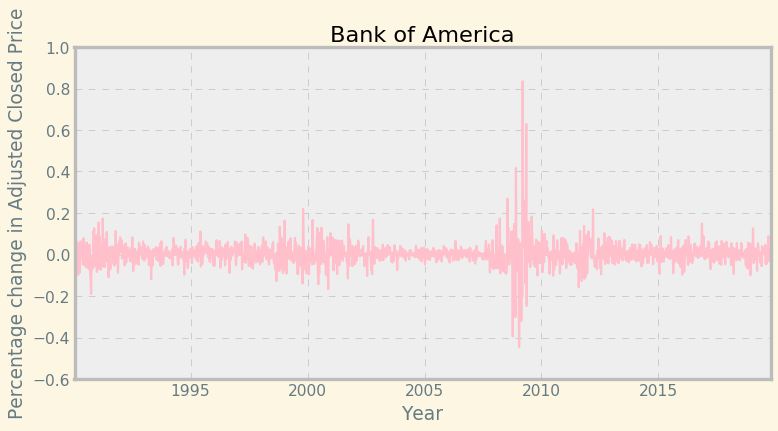

In [113]:
# Plot the graph
plt.style.use('bmh')

ax = df_bac['pct_change'].plot(color = 'pink', grid = True, figsize = (10,5))
ax.set_xlabel('Year')
ax.set_ylabel('Percentage change in Adjusted Closed Price')
ax.set_title('Bank of America')

<AxesSubplot:ylabel='Density'>

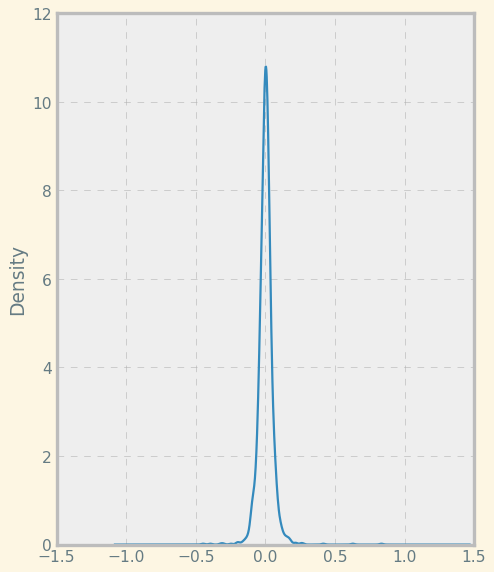

In [114]:
df_bac['pct_change'].plot(kind = 'density', grid = True, linewidth = 2)

##### JP Morgan

In [115]:
df_jpm.head()

Adj Close
Date                 
1990-01-02   3.483539
1990-01-03   3.599656
1990-01-04   3.614169
1990-01-05   3.628687
1990-01-08   3.628687

In [116]:
df_jpm = df_jpm.resample(rule = 'W').last()

df_jpm['pct_change'] = df_jpm['Adj Close'].pct_change()
df_jpm.dropna(inplace = True)
df_jpm.head()

Adj Close  pct_change
Date                             
1990-01-14   3.425480   -0.056000
1990-01-21   3.352906   -0.021187
1990-01-28   3.077127   -0.082251
1990-02-04   3.033582   -0.014151
1990-02-11   3.004552   -0.009570

In [117]:
df_jpm.describe()

Adj Close   pct_change
count  1554.000000  1554.000000
mean     31.140202     0.003503
std      25.564720     0.050781
min       1.393528    -0.340876
25%      14.809187    -0.021296
50%      26.015284     0.002983
75%      34.695568     0.027221
max     115.756325     0.490897

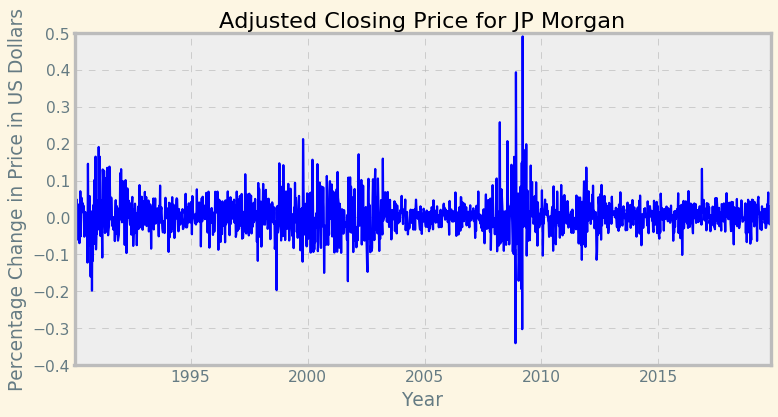

In [118]:
plt.style.use('bmh')

ax = df_jpm['pct_change'].plot(color = 'blue', grid = True, figsize = (10,5))
ax.set_xlabel('Year')
ax.set_ylabel('Percentage Change in Price in US Dollars')
ax.set_title('Adjusted Closing Price for JP Morgan')

plt.show()

<AxesSubplot:ylabel='Density'>

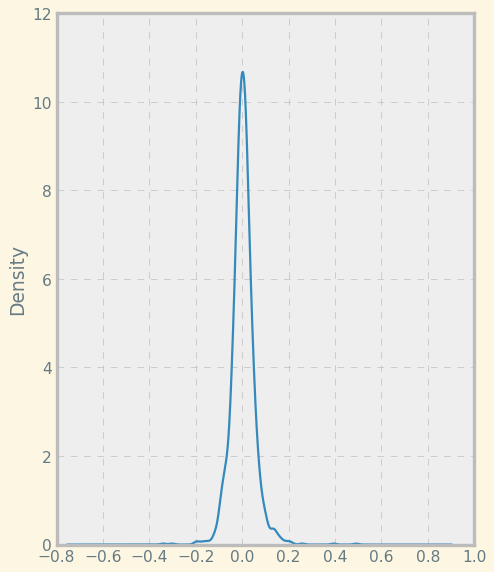

In [119]:
df_jpm['pct_change'].plot(kind = 'kde', grid = True, linewidth = 2)

#### Log Transformation

In [120]:
df_f['furniture_log'] = np.log(df_f['furniture_price_adjusted'])
df_f.head()

millions_of_dollars    cpi  cpi_sept20_rate  \
month                                                     
1992-02-01                 3908  138.6         0.532649   
1992-03-01                 4157  139.1         0.534570   
1992-04-01                 4141  139.4         0.535723   
1992-05-01                 4275  139.7         0.536876   
1992-06-01                 4357  140.1         0.538413   

            furniture_price_adjusted  furniture_pct_change  furniture_log  
month                                                                      
1992-02-01               2081.591336              0.018325       7.640888  
1992-03-01               2222.208686              0.067553       7.706257  
1992-04-01               2218.429801             -0.001701       7.704555  
1992-05-01               2295.145441              0.034581       7.738551  
1992-06-01               2345.866976              0.022099       7.760410

In [121]:
df_f.describe()

millions_of_dollars         cpi  cpi_sept20_rate  \
count           344.000000  344.000000       344.000000   
mean           7635.563953  199.589459         0.767035   
std            1699.600343   36.150847         0.138930   
min            3865.000000  138.600000         0.532649   
25%            6604.250000  165.625000         0.636508   
50%            7698.500000  201.550000         0.774570   
75%            8893.500000  233.066750         0.895691   
max           11297.000000  260.209000         1.000000   

       furniture_price_adjusted  furniture_pct_change  furniture_log  
count                344.000000            344.000000     344.000000  
mean                6029.922755              0.010998       8.631026  
std                 2149.451999              0.109829       0.402077  
min                 2081.591336             -0.513479       7.640888  
25%                 4314.255272             -0.032457       8.369678  
50%                 6116.502919              0.023095       8.718745  
75%                 7438.823489              0.074349       8.914465  
max                10928.366552              0.845346       9.299117

<AxesSubplot:xlabel='month'>

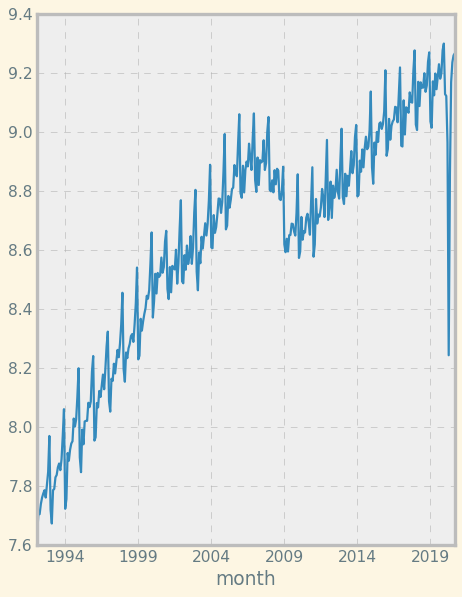

In [122]:
df_f['furniture_log'].plot()

<AxesSubplot:ylabel='Density'>

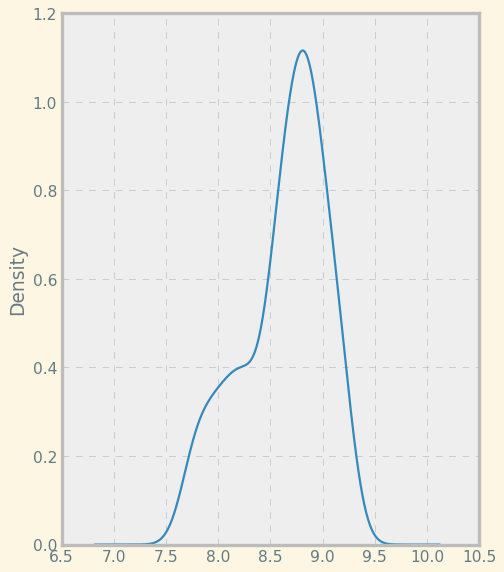

In [123]:
df_f['furniture_log'].plot(kind = 'kde')

### Correlation: Relationship between series

Types:

1. Low Correlation
2. Medium Correlation
3. High Correlation

Correlation is a measure of the direction and strength of a relationship. In this case, we are looking at two time series. Measurements are from -1 to 1 with 0 meaning no relationship or zero correlation between the two series. 1 emans a perfect, positive correlation, and -1 means a perfect, negative correlation. High correlations are toward 1 or -1 whereas low correlations are toward 0. In time series, one must be cautioned when viewing correlation, given the time period. You can imagine that on one day, there is strong, positive correlation but that the very next day, it could be a different story about the relationship between the two series.

#### Low Correlation

##### Google trends: Freedom and Choice

In [124]:
freedom_choice = pd.read_csv('freedom_choice.csv', skiprows = 1)

col_names = ['week','freedom','choice']
freedom_choice.columns = col_names

df_fc = pd.DataFrame(freedom_choice)
df_fc['week'] = pd.to_datetime(df_fc['week'], infer_datetime_format = True)

df_fc.set_index('week', inplace = True)

df_fc.head()

freedom  choice
week                       
2004-01-01       61      54
2004-02-01       65      50
2004-03-01       64      52
2004-04-01       69      56
2004-05-01       70      53

In [125]:
df_fc.isna().sum()

freedom    0
choice     0
dtype: int64

In [126]:
df_fc.describe()

freedom      choice
count  203.000000  203.000000
mean    56.502463   58.334975
std      5.114892    8.214097
min     45.000000   44.000000
25%     53.000000   52.000000
50%     56.000000   57.000000
75%     59.000000   63.500000
max     72.000000  100.000000

array([<AxesSubplot:xlabel='week'>, <AxesSubplot:xlabel='week'>],
      dtype=object)

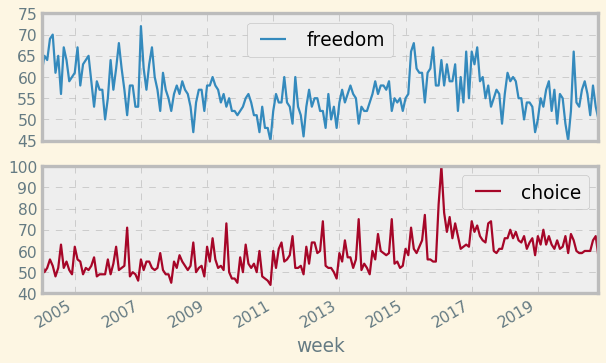

In [127]:
df_fc.plot(figsize = (8,5), subplots = True)

In [128]:
# Perform correlation

df_fc['freedom'].corr(df_fc['choice'])

0.06219399246976932

##### Google Trends: Globalism and Localism

In [129]:
glocal = pd.read_csv('global_local.csv', skiprows = 2)

col_names = ['week','globalism','localism']
glocal.columns = col_names

df_gc = pd.DataFrame(glocal)
df_gc['week'] = pd.to_datetime(df_gc['week'], infer_datetime_format = True)
df_gc.set_index('week', inplace = True)

df_gc.head()

globalism  localism
week                           
2004-01-01         42        42
2004-02-01         69        21
2004-03-01         88        26
2004-04-01         40        20
2004-05-01         80        46

In [130]:
df_gc.isna().sum()

globalism    0
localism     0
dtype: int64

In [131]:
df_gc.describe()

globalism    localism
count  203.000000  203.000000
mean    27.674877    9.655172
std     16.990175    6.011483
min      6.000000    0.000000
25%     15.000000    6.000000
50%     24.000000    8.000000
75%     36.000000   12.000000
max    100.000000   46.000000

array([<AxesSubplot:xlabel='week'>, <AxesSubplot:xlabel='week'>],
      dtype=object)

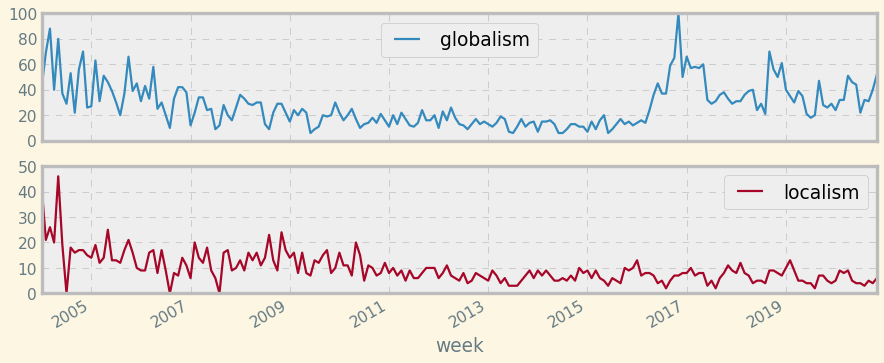

In [132]:
df_gc.plot(figsize = (12,5), subplots = True)

In [133]:
df_gc['globalism'].corr(df_gc['localism'])

0.33382160307264425

#### Medium Correlation

##### Adjusted stock price of Bank of America and JP Morgan

In [134]:
df_bac.head()

Adj Close  pct_change
Date                             
1990-01-14   4.032017   -0.050000
1990-01-21   4.173489    0.035087
1990-01-28   4.055598   -0.028248
1990-02-04   4.043808   -0.002907
1990-02-11   3.973068   -0.017493

In [135]:
df_jpm.head()

Adj Close  pct_change
Date                             
1990-01-14   3.425480   -0.056000
1990-01-21   3.352906   -0.021187
1990-01-28   3.077127   -0.082251
1990-02-04   3.033582   -0.014151
1990-02-11   3.004552   -0.009570

In [136]:
df_banks = pd.concat([df_bac,df_jpm], axis = 1)
df_banks.head()

Adj Close  pct_change  Adj Close  pct_change
Date                                                    
1990-01-14   4.032017   -0.050000   3.425480   -0.056000
1990-01-21   4.173489    0.035087   3.352906   -0.021187
1990-01-28   4.055598   -0.028248   3.077127   -0.082251
1990-02-04   4.043808   -0.002907   3.033582   -0.014151
1990-02-11   3.973068   -0.017493   3.004552   -0.009570

In [137]:
col_names = ['bac_closeprice','bac_pct_change','jpm_closeprice','jpm_pct_change']
df_banks.columns = col_names

df_banks.head()

bac_closeprice  bac_pct_change  jpm_closeprice  jpm_pct_change
Date                                                                      
1990-01-14        4.032017       -0.050000        3.425480       -0.056000
1990-01-21        4.173489        0.035087        3.352906       -0.021187
1990-01-28        4.055598       -0.028248        3.077127       -0.082251
1990-02-04        4.043808       -0.002907        3.033582       -0.014151
1990-02-11        3.973068       -0.017493        3.004552       -0.009570

<AxesSubplot:xlabel='Date'>

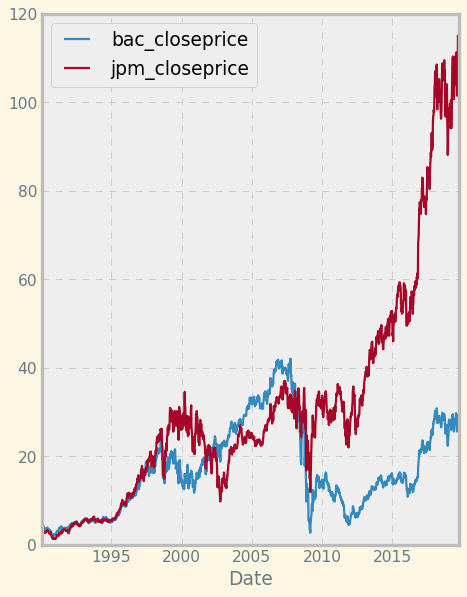

In [138]:
df_banks[['bac_closeprice','jpm_closeprice']].plot()

In [139]:
df_banks['bac_closeprice'].corr(df_banks['jpm_closeprice'])

0.43832083781887216

###### Rolling window of Correlation

In [140]:
df_banks['bac_closeprice'].rolling(window = 6).corr(df_banks['jpm_closeprice']).head(50)

Date
1990-01-14         NaN
1990-01-21         NaN
1990-01-28         NaN
1990-02-04         NaN
1990-02-11         NaN
1990-02-18    0.325643
1990-02-25    0.523953
1990-03-04    0.139181
1990-03-11   -0.095479
1990-03-18   -0.095502
1990-03-25    0.119765
1990-04-01    0.346842
1990-04-08    0.685168
1990-04-15    0.870324
1990-04-22    0.803562
1990-04-29    0.643094
1990-05-06    0.713518
1990-05-13    0.911296
1990-05-20    0.838482
1990-05-27    0.402439
1990-06-03    0.439333
1990-06-10    0.407198
1990-06-17    0.548461
1990-06-24    0.745362
1990-07-01    0.792682
1990-07-08    0.942962
1990-07-15    0.948879
1990-07-22    0.761452
1990-07-29    0.502555
1990-08-05    0.800681
1990-08-12    0.652014
1990-08-19    0.488288
1990-08-26    0.691969
1990-09-02    0.579543
1990-09-09    0.382150
1990-09-16    0.892347
1990-09-23    0.969328
1990-09-30    0.972408
1990-10-07    0.970925
1990-10-14    0.967315
1990-10-21    0.944765
1990-10-28    0.882476
1990-11-04    0.857496
1990-1

In [141]:
# Calculate rolling window of correlation
df_banks['bac_closeprice'].rolling(window = 6).corr(df_banks['jpm_closeprice']).tail(50)

Date
2018-11-11    0.926930
2018-11-18    0.740276
2018-11-25    0.873414
2018-12-02    0.967131
2018-12-09    0.976354
2018-12-16    0.996443
2018-12-23    0.989259
2018-12-30    0.981128
2019-01-06    0.975889
2019-01-13    0.850054
2019-01-20    0.908735
2019-01-27    0.942514
2019-02-03    0.929784
2019-02-10    0.855061
2019-02-17    0.822216
2019-02-24    0.525391
2019-03-03    0.511332
2019-03-10    0.723750
2019-03-17    0.877429
2019-03-24    0.929207
2019-03-31    0.948324
2019-04-07    0.938450
2019-04-14    0.961044
2019-04-21    0.955692
2019-04-28    0.974316
2019-05-05    0.973255
2019-05-12    0.886621
2019-05-19    0.764559
2019-05-26    0.979923
2019-06-02    0.993410
2019-06-09    0.991917
2019-06-16    0.984340
2019-06-23    0.968578
2019-06-30    0.982814
2019-07-07    0.966207
2019-07-14    0.932022
2019-07-21    0.948871
2019-07-28    0.904956
2019-08-04    0.808864
2019-08-11    0.898490
2019-08-18    0.954628
2019-08-25    0.993742
2019-09-01    0.984015
2019-0

##### Google Trends: Materialism and Consumerism

In [142]:
mat_con = pd.read_csv('materialism_consumerism.csv', skiprows = 2)

col_names = ['month','materialism','consumerism']
mat_con.columns = col_names

df_mc = pd.DataFrame(mat_con)
df_mc['month'] = pd.to_datetime(df_mc['month'], infer_datetime_format = True)

df_mc.set_index('month', inplace = True)
df_mc.head()

materialism  consumerism
month                               
2004-01-01           40           23
2004-02-01           68           60
2004-03-01           63           55
2004-04-01           72           60
2004-05-01           66           51

<AxesSubplot:xlabel='month'>

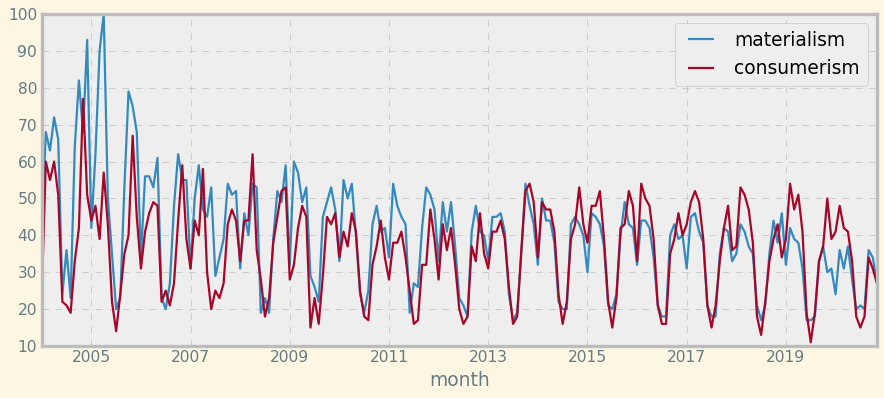

In [143]:
df_mc.plot(figsize = (12,5))

In [144]:
df_mc['materialism'].corr(df_mc['consumerism'])

0.7228740564242095

##### Google Trends: Des Moines and New York

In [145]:
des_ny = pd.read_csv('desmon_ny.csv', skiprows = 2)

col_names = ['month','des_moines','new_york']
des_ny.columns = col_names

df_cities = pd.DataFrame(des_ny)
df_cities['month'] = pd.to_datetime(df_cities['month'], infer_datetime_format = True)

df_cities.set_index('month', inplace = True)

df_cities.head()

des_moines  new_york
month                           
2004-01-01           3        95
2004-02-01           3        91
2004-03-01           3        94
2004-04-01           3        94
2004-05-01           3        95

<AxesSubplot:xlabel='month'>

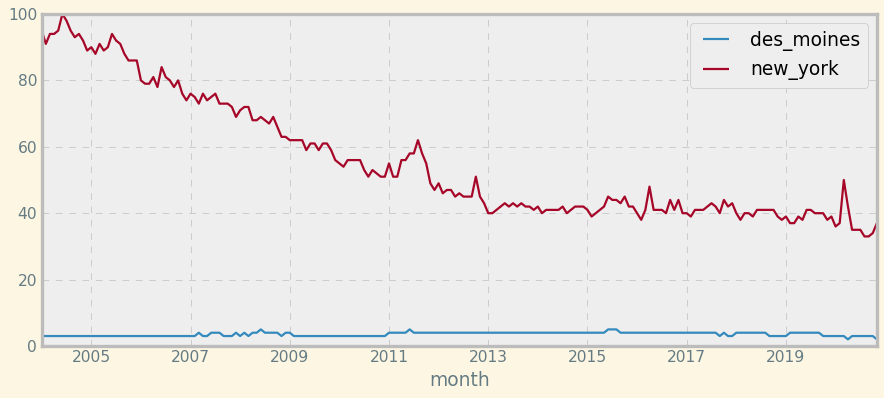

In [146]:
df_cities.plot(figsize = (12,5))

If you eyeball it, you'll probably notice no relation/very low correlation. But let's see what the correlation is according to Python

In [147]:
df_cities['des_moines'].corr(df_cities['new_york'])

-0.45841915699932845

#### High Correlation

##### Google Trends: Growth and Economy

In [148]:
grow_eco = pd.read_csv('growth_economy.csv', skiprows = 2)

col_names = ['month','growth','economy']
grow_eco.columns = col_names

df_ge = pd.DataFrame(grow_eco)
df_ge['month'] = pd.to_datetime(df_ge['month'], infer_datetime_format = True)

df_ge.set_index('month', inplace = True)

df_ge.head()

growth  economy
month                      
2004-01-01      88       56
2004-02-01      89       60
2004-03-01      93       64
2004-04-01      96       67
2004-05-01      90       68

In [149]:
df_ge.describe()

growth     economy
count  203.000000  203.000000
mean    75.724138   46.591133
std      9.664816   10.233188
min     55.000000   28.000000
25%     69.500000   40.500000
50%     75.000000   47.000000
75%     82.500000   51.000000
max    100.000000   89.000000

<AxesSubplot:xlabel='month'>

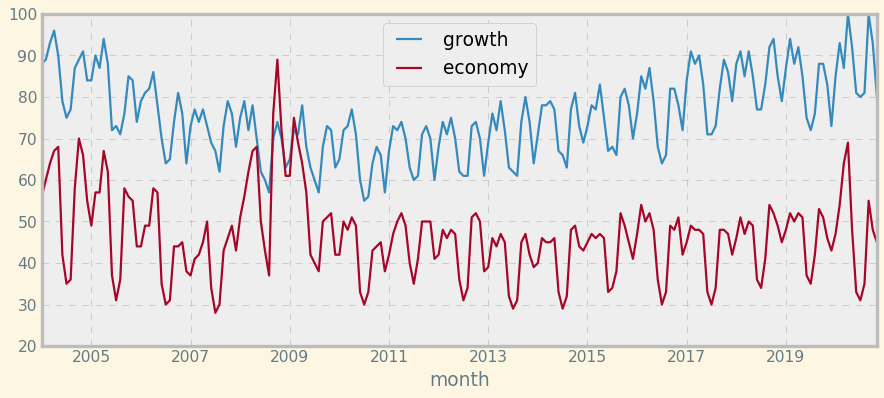

In [150]:
df_ge.plot(figsize = (12,5))

In [151]:
df_ge['growth'].corr(df_ge['economy'])

0.5179202189401283

In [152]:
grow_eco_ly = pd.read_csv('growth_eco_lastyear.csv', skiprows = 1)

col_names = ['week','growth','economy']
grow_eco_ly.columns = col_names

df_ge_year = pd.DataFrame(grow_eco_ly)
df_ge_year['week'] = pd.to_datetime(df_ge_year['week'], infer_datetime_format = True)

df_ge_year.set_index('week', inplace = True)

df_ge_year.head()

growth  economy
week                       
2019-11-17      83       46
2019-11-24      61       33
2019-12-01      79       46
2019-12-08      79       50
2019-12-15      68       44

<AxesSubplot:xlabel='week'>

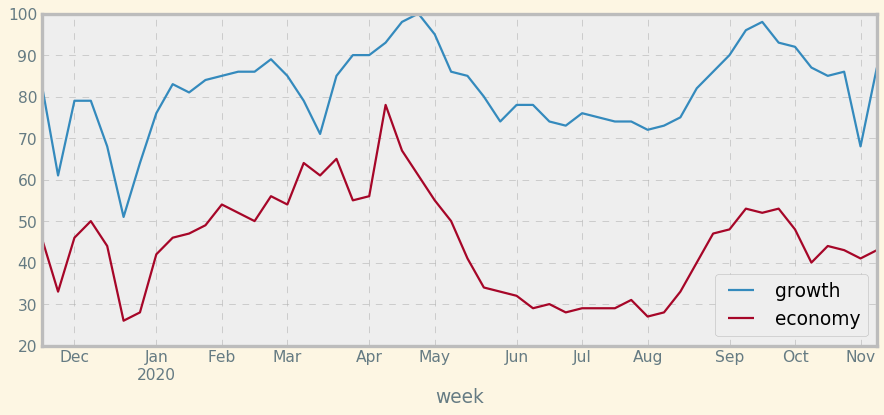

In [153]:
df_ge_year.plot(figsize = (12,5))

In [154]:
df_ge_year['growth'].corr(df_ge_year['economy'])

0.6897648007720987

##### Google Trends: Population and Crime 

In [155]:
pop_crime = pd.read_csv('population_crime.csv', skiprows = 1)

col_names = ['month','population','crime']
pop_crime.columns = col_names

df_pc = pd.DataFrame(pop_crime)
df_pc['month'] = pd.to_datetime(df_pc['month'], infer_datetime_format = True)

df_pc.set_index('month', inplace = True)

df_pc.head()

population  crime
month                        
2004-01-01          44     27
2004-02-01          47     28
2004-03-01          48     30
2004-04-01          52     30
2004-05-01          50     27

In [156]:
df_pc.describe()

population       crime
count  203.000000  203.000000
mean    35.862069   23.625616
std     10.518757    2.831529
min     21.000000   18.000000
25%     30.000000   22.000000
50%     34.000000   23.000000
75%     41.000000   26.000000
max    100.000000   35.000000

In [157]:
df_pc.isna().sum()

population    0
crime         0
dtype: int64

<AxesSubplot:xlabel='month'>

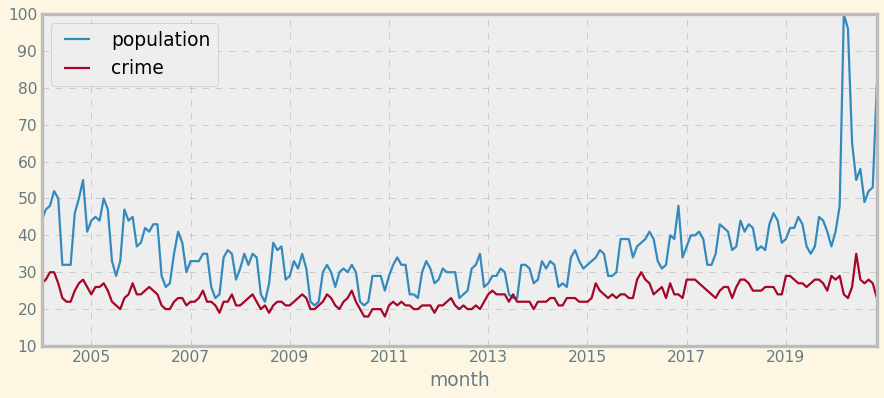

In [158]:
df_pc.plot(figsize = (12,5))

In [159]:
df_pc['population'].corr(df_pc['crime'])

0.5681995950694937

### Autocorrelation: Relationship within Series

Why do we autocorrelate data?

Autocorrelation plots (Box and Jenkins, pp. 28-32) are a commonly-used tool for _checking randomness in a data set_. This randomness is ascertained by computing autocorrelations for data values at varying time lags. If random, such autocorrelations should be near zero for any and all time-lag separations.

1. White Noise
2. Autocorrelation function (ACF)
3. Partial autocorrelation function (PACF)

Much like correlation, autocorrelation gives a measure of the strength and direction of a relationship between two time series. Autocorrelation is done with a variable and its lag. It's a correlation with itself, hence autocorrelation. Basically, you are using the same time series and creating a second series, which is shifted by a time step. It is common to use the autocorrelation (ACF) plot to visualise the autocorrelation of a time-series. Let's start by taking a look at white noise:

#### White Noise, ACF, PACF

If your time series is statistically uncorrelated (independent) with zero mean and constant variance, then you have a particular type of noise called white noise.

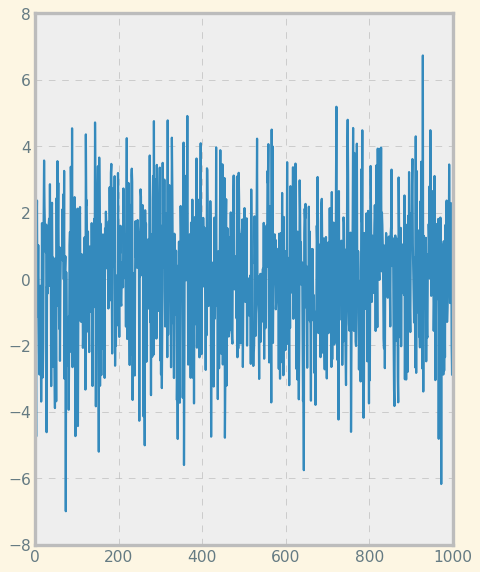

In [160]:
# loc is mean, scale is standard deviation
white_noise = np.random.normal(loc = 0, scale = 2, size = 1000)

plt.plot(white_noise)

In [161]:
white_noise.mean(), white_noise.std()

(0.07580133644425543, 1.9769860766769674)

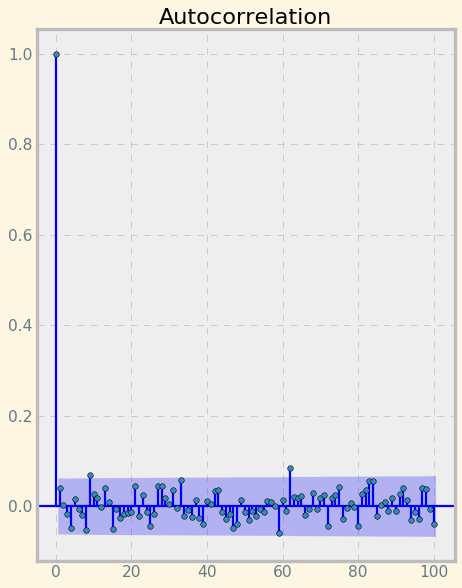

In [162]:
# Plot autocorrelation
from statsmodels.graphics.tsaplots import plot_acf
# Example of white noise autocorrelation (serial correlation)
plot_acf(white_noise, lags = 100);

Be aware that all the lags have close to zero autocorrelation so this means that lagged values cannot be used in prediction. All the lagged variables are random and are not useful for prediction.

##### Example 1: Vacation Data

In [163]:
df_v.head()

num_search_vacation  first_diff  second_diff
month                                                   
2004-04-01                   77        -7.0        -11.0
2004-05-01                   85         8.0          1.0
2004-06-01                   94         9.0         17.0
2004-07-01                   93        -1.0          8.0
2004-08-01                   76       -17.0        -18.0

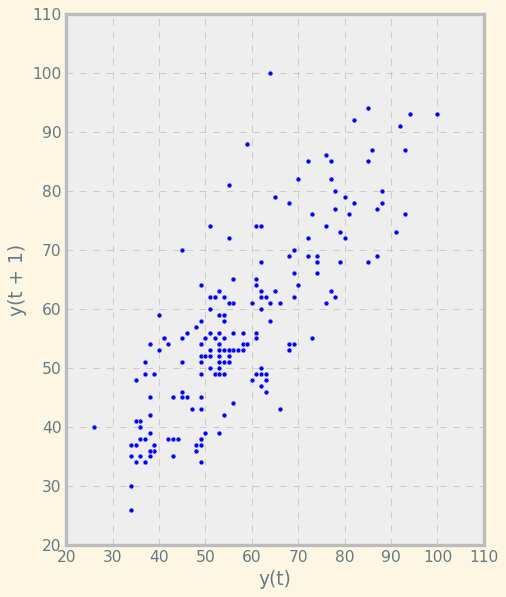

In [164]:
# Lag plot
from pandas.plotting import lag_plot

lag_plot(df_v['num_search_vacation'])
plt.show()

The plot above shows the vacation data on the y(t) against its previous time step, prior month, the y(t+1). You can think of the data shifted by a month and then plotted, removing the first data point. Clearly, we see a positive relationship, though it has a broader range of scatter.

In [165]:
# Autocorrelation
autocorrelation = df_v['num_search_vacation'].autocorr()
autocorrelation

0.7932143811576305

The correlation between the vacation data and it lag variable by a time step shows generally medium to high correlation at 0.80. This indicates that there is a substantial, positive relationship.

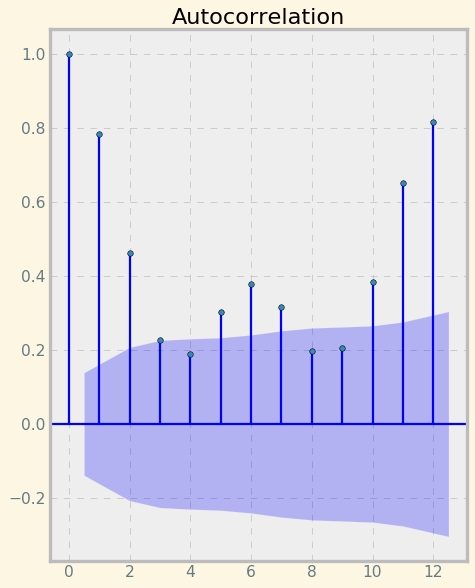

In [166]:
# Plot ACF to visualise the autocorrelation
plot_acf(df_v['num_search_vacation'], lags = 12);

The partial autocorrelation function (PACF) gives the partial correlation of a time series with its own lagged values. It controls for other lags. The idea for the PACF is taht we perform correlation between a variable and itself lagged and then we subtract that effect from the variable and then find out what residual correlation is left over from that variable and further lags. For example, a PACF of order 3 returns the correlation between our time series (t1,t2,t3,..) and its own values lagged by 3 time points (t4,t5,t6,..) but only after removing all effects attributable to lags 1 and 2.

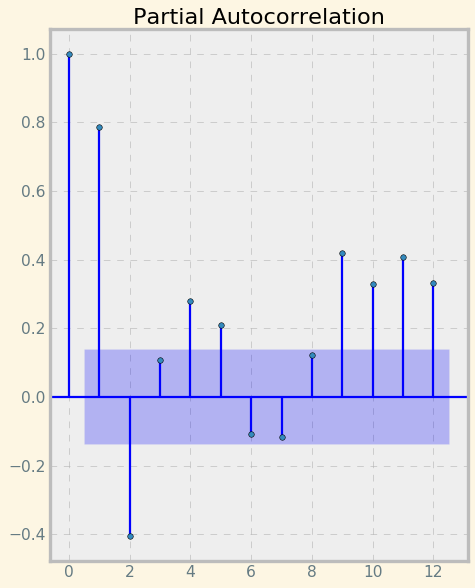

In [167]:
# Plot Partial autocorrelation function (PACF)

from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df_v['num_search_vacation'],lags = 12);

If partial autocorrelation values are close to 0, then values between observations and lagged observations are not correlated with one another. Inversely, partial autocorrelations with values close to 1 or -1 indicate that there exists strong positive or negative correlations between the lagged observations of the time series.


The .plot_pacf() function also returns confidence intervals, which are represented as blue shaded regions. If partial autocorrelation values are beyond this confidence interval regions, then you can assume that the observed partial autocorrelation values are statistically significant.

##### Example 2: Furniture Data

In [168]:
df_f.head()

millions_of_dollars    cpi  cpi_sept20_rate  \
month                                                     
1992-02-01                 3908  138.6         0.532649   
1992-03-01                 4157  139.1         0.534570   
1992-04-01                 4141  139.4         0.535723   
1992-05-01                 4275  139.7         0.536876   
1992-06-01                 4357  140.1         0.538413   

            furniture_price_adjusted  furniture_pct_change  furniture_log  
month                                                                      
1992-02-01               2081.591336              0.018325       7.640888  
1992-03-01               2222.208686              0.067553       7.706257  
1992-04-01               2218.429801             -0.001701       7.704555  
1992-05-01               2295.145441              0.034581       7.738551  
1992-06-01               2345.866976              0.022099       7.760410

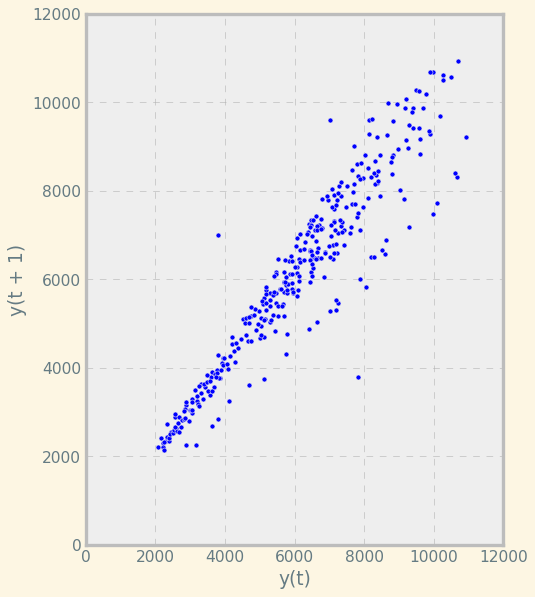

In [169]:
# Lag Plot

lag_plot(df_f['furniture_price_adjusted'])
plt.show()

The plot above shows the furniture data aginst its previous time step, prior month. You can think of the data shifted by a month and then plotted, removing the first data point. Clearly, we see a positive relationship.

In [170]:
# Autocorrelation

df_f['furniture_price_adjusted'].autocorr()

0.943578434986159

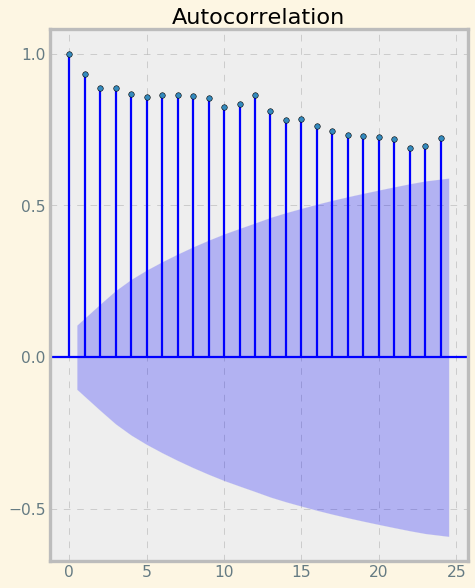

In [171]:
# Plot ACF
plot_acf(df_f['furniture_price_adjusted'], lags = 24);

The x-axis shows the number of lags where the y-axis shows the correlation value. Note that correlation measure runs from -1 to 1. The results show positive correlation. The scores all extend beyond the blue shaded region, which denotes statistical significance. For each time period, the measure is of its current time value's with its prior time value. It shows strong positive, autocorrelation up to 24 lags.

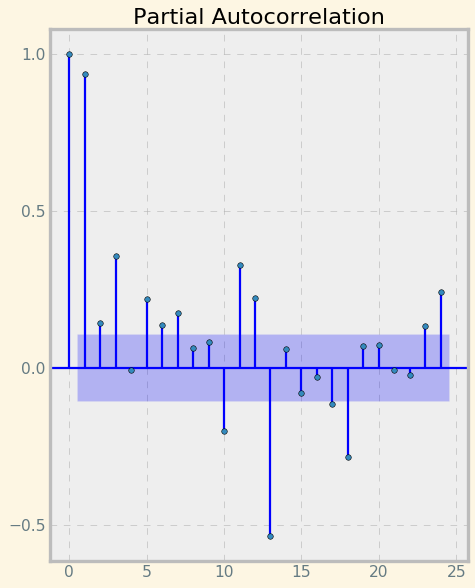

In [172]:
# Partial Autocorrelation Function
plot_pacf(df_f['furniture_price_adjusted'], lags = 24);

Strong partial autocorrelation at the first two lags. The candlesticks extend beyond the margin of uncertainty for lags 3 and 4 as well as 11 and 12, going i the positive direction. In terms of negative correlation, lag 10, 13 and 18 show statistical significance in terms of negative correlation.

##### Example 3: Adjusted Close Stock Price for Bank of America

In [173]:
df_bac.head()

Adj Close  pct_change
Date                             
1990-01-14   4.032017   -0.050000
1990-01-21   4.173489    0.035087
1990-01-28   4.055598   -0.028248
1990-02-04   4.043808   -0.002907
1990-02-11   3.973068   -0.017493

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

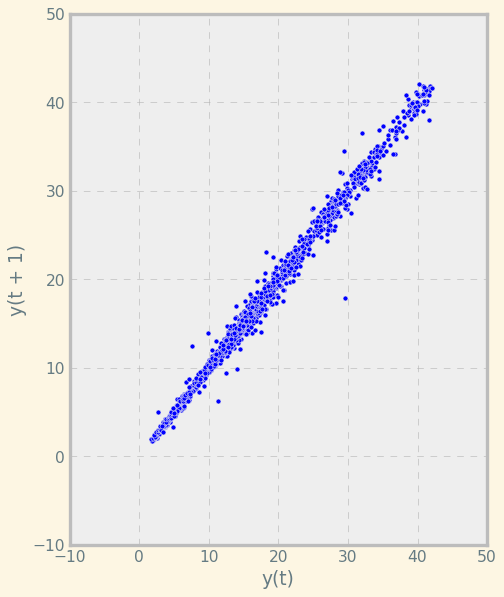

In [174]:
# Plot lag
lag_plot(df_bac['Adj Close'])

In [175]:
# Calculate Autocorrelation
df_bac['Adj Close'].autocorr()

0.9964787813847203

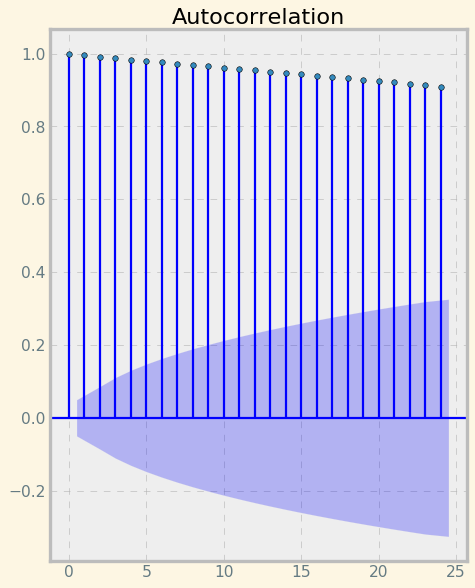

In [176]:
# Plot Autocorrelation Function
plot_acf(df_bac['Adj Close'], lags = 24);

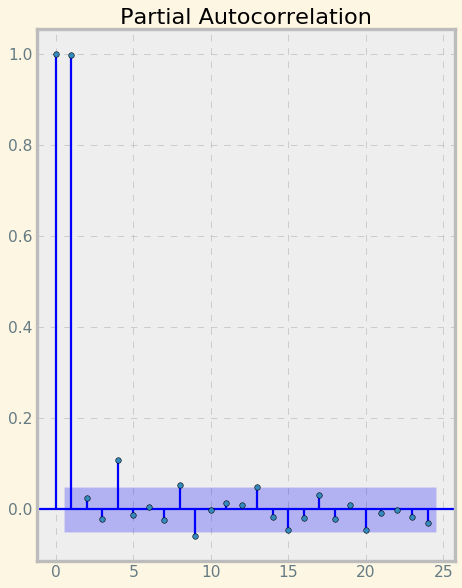

In [177]:
# Plot Partial Autocorrelation Function

plot_pacf(df_bac['Adj Close'], lags = 24);

##### Example 4: Adjusted Close Stock Price for JP Morgan

In [178]:
df_jpm.head()

Adj Close  pct_change
Date                             
1990-01-14   3.425480   -0.056000
1990-01-21   3.352906   -0.021187
1990-01-28   3.077127   -0.082251
1990-02-04   3.033582   -0.014151
1990-02-11   3.004552   -0.009570

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

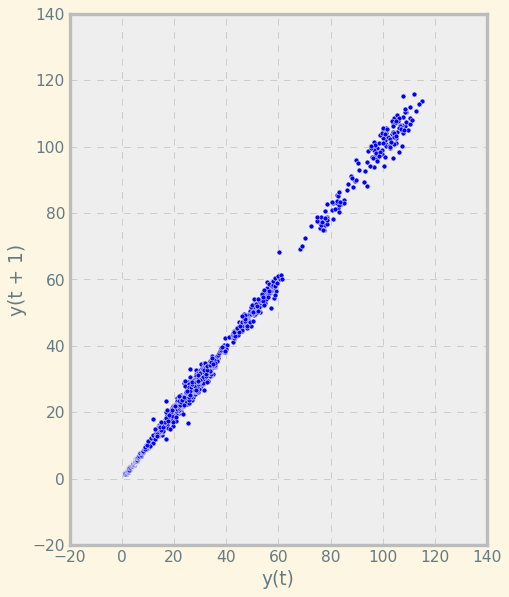

In [179]:
# Plot lag
lag_plot(df_jpm['Adj Close'])

In [180]:
# Plot autocorrelation
df_jpm['Adj Close'].autocorr()

0.9984432351375839

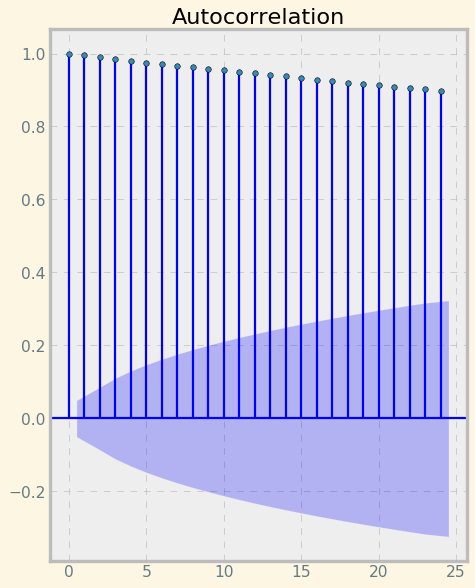

In [181]:
# Plot Autocorrelation Function
plot_acf(df_jpm['Adj Close'], lags = 24);

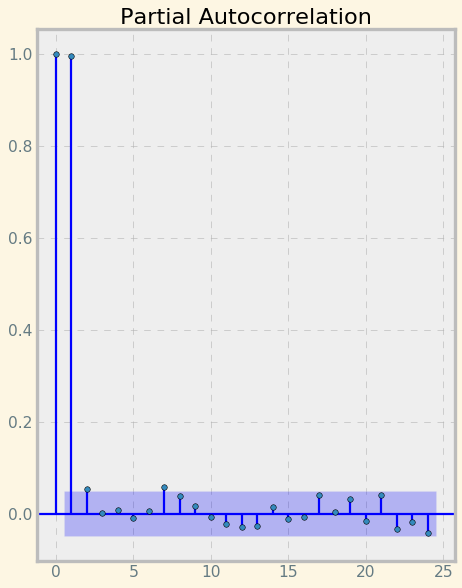

In [182]:
# Plot Partial Autocorrelation Function

plot_pacf(df_jpm['Adj Close'], lags = 24);

##### Example 5: Monthly Average Temperature of St. Louis

In [183]:
df_t.set_index('date', inplace = True)
df_t.head()

avg_temp  anomaly  mean_diff
date                                    
1938-04-01      56.6      0.0   0.292268
1938-05-01      64.9     -1.4   8.592268
1938-06-01      73.5     -2.1  17.192268
1938-07-01      80.5      0.9  24.192268
1938-08-01      81.3      3.4  24.992268

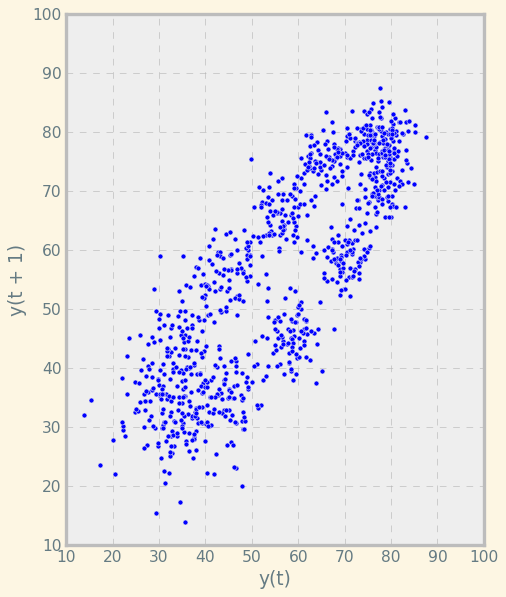

In [184]:
# Plot lag
lag_plot(df_t['avg_temp'])
plt.show()

In [185]:
# Plot Autocorrelation

df_t['avg_temp'].autocorr()

0.8328413766219632

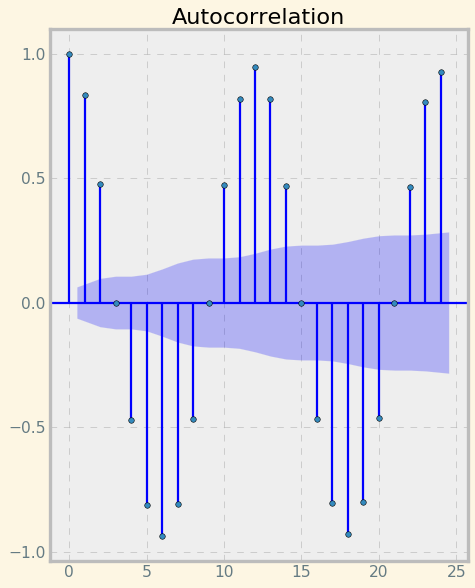

In [186]:
# Plot Autocorrelation Function
plot_acf(df_t['avg_temp'], lags = 24);

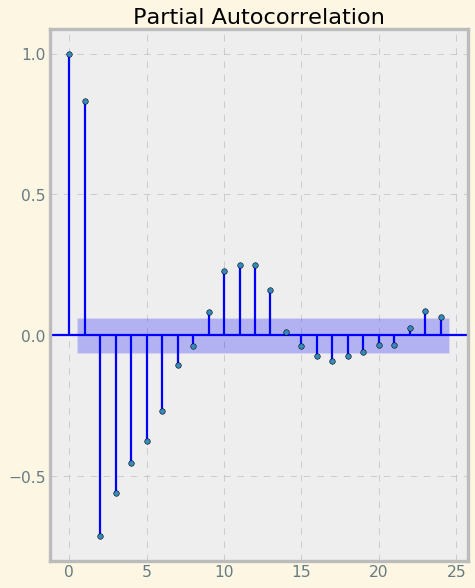

In [187]:
# Plot Partial Autocorrelation Function
plot_pacf(df_t['avg_temp'], lags = 24);

### Operating with Time Series Models: Stationarity in Time Series

In certain situations, you may need to make stationary your data, but there are certainly no hard and fast rules. You can achieve stationarity when you remove trend and seasonality such that you have constant mean and variance. In particular data domains and situations, your time series data may need to be made stationary before applying any statistical analysis. But, be aware that even "weakly" stationary data can also be acceptable. So of course, you can always work with the original data and then compare those results against the data that has been made stationary. 

**Augmented Dickey - Fuller Test**

To model a time series, it can be stationary or weakly stationary. The distribution of the data does not change over time. The series has zero trend, the variance is constant, and the autocorrelation is constant. The augmented Dicket-Fuller Test is a statistical test for non-stationarity. The null hypothesis is that the time seris is non-stationary due to trend.

In [188]:
from statsmodels.tsa.stattools import adfuller

The more negative the test-statistic, then it is more likely that the data is stationary. For the p-value, if it is small such that it is below 0.05, then we reject the null hypothesis. This means we assume that the time series must be stationary. For the critical values, if we want a p-value of 0.05 or below, our test statistic needs to be below the corresponding critical value.

##### Example 1: Vacation data, first difference

In [189]:
df_v.head()

num_search_vacation  first_diff  second_diff
month                                                   
2004-04-01                   77        -7.0        -11.0
2004-05-01                   85         8.0          1.0
2004-06-01                   94         9.0         17.0
2004-07-01                   93        -1.0          8.0
2004-08-01                   76       -17.0        -18.0

In [190]:
# Run test
vacation_result = adfuller(df_v['first_diff'])

# Print the test statistic
print(vacation_result[0])

# Print the p-value
print(vacation_result[1])

# Print the critical values for the test statistic for 1%, 5% and 10%
print(vacation_result[4])

-5.910013848462733
2.6524700580171246e-07
{'1%': -3.465620397124192, '5%': -2.8770397560752436, '10%': -2.5750324547306476}


The p-value is very very low (2.65 e to the power of negative 7) which is definitely lower than the 0.05 threshold therefore we reject the null and claim that the series is stationary.

##### Example 2: Furniture data, percentage change

In [191]:
df_f.head()

millions_of_dollars    cpi  cpi_sept20_rate  \
month                                                     
1992-02-01                 3908  138.6         0.532649   
1992-03-01                 4157  139.1         0.534570   
1992-04-01                 4141  139.4         0.535723   
1992-05-01                 4275  139.7         0.536876   
1992-06-01                 4357  140.1         0.538413   

            furniture_price_adjusted  furniture_pct_change  furniture_log  
month                                                                      
1992-02-01               2081.591336              0.018325       7.640888  
1992-03-01               2222.208686              0.067553       7.706257  
1992-04-01               2218.429801             -0.001701       7.704555  
1992-05-01               2295.145441              0.034581       7.738551  
1992-06-01               2345.866976              0.022099       7.760410

In [192]:
# Run the test
furniture_result = adfuller(df_f['furniture_pct_change'])

# Print the test statistic
print(furniture_result[0])

# Print the p-value
print(furniture_result[1])

# Print the critical values for the test statistic at 1%, 5% and 10%
print(furniture_result[4])

-3.714653211338953
0.003911701464602107
{'1%': -3.4503224123605194, '5%': -2.870338478726661, '10%': -2.571457612488522}


##### Example 3: Bank of America stock price data, percentage change

In [193]:
df_bac.head()

Adj Close  pct_change
Date                             
1990-01-14   4.032017   -0.050000
1990-01-21   4.173489    0.035087
1990-01-28   4.055598   -0.028248
1990-02-04   4.043808   -0.002907
1990-02-11   3.973068   -0.017493

In [194]:
# Run the test
bac_result = adfuller(df_bac['pct_change'])

# Print the test statistic
print(bac_result[0])

# Print the p-value
print(bac_result[1])

# Print the critical values for the test statistic at 1%, 5% and 10%
print(bac_result[4])

-9.541761748426111
2.714781898565774e-16
{'1%': -3.434634049963598, '5%': -2.863432142744973, '10%': -2.5677773493449725}


##### Example 4: JP Morgan stock price data, percentage change

In [195]:
df_jpm.head()

Adj Close  pct_change
Date                             
1990-01-14   3.425480   -0.056000
1990-01-21   3.352906   -0.021187
1990-01-28   3.077127   -0.082251
1990-02-04   3.033582   -0.014151
1990-02-11   3.004552   -0.009570

In [196]:
# Run the test
jpm_result = adfuller(df_jpm['pct_change'])

# Print the test statistics
print(jpm_result[0])

# print the p-value
print(jpm_result[1])

# Print the critical values for test statistic at 1%, 5% and 10%
print(jpm_result[4])

-9.894673890724695
3.483379893802281e-17
{'1%': -3.434617276362776, '5%': -2.863424739608777, '10%': -2.5677734071449034}


##### Average Temperature of St. Louis, difference from the mean.

In [197]:
df_t.head()

avg_temp  anomaly  mean_diff
date                                    
1938-04-01      56.6      0.0   0.292268
1938-05-01      64.9     -1.4   8.592268
1938-06-01      73.5     -2.1  17.192268
1938-07-01      80.5      0.9  24.192268
1938-08-01      81.3      3.4  24.992268

In [198]:
# Run the test
temp_result = adfuller(df_t['mean_diff'])

# Print the test statistic
print(temp_result[0])

# Print the p-value
print(temp_result[1])

# Print the critical values for the test statistic at 1%, 5% and 10%
print(temp_result[4])


-5.104065793366336
1.3757478666651555e-05
{'1%': -3.437274090836024, '5%': -2.8645968274636933, '10%': -2.5683976306326097}


### Autoregression (AR) and Moving Average (MA) Models

**Autogression model (AR)**: It is a rergession between a time series and itself lagged by a time step or steps

**Moving Average model (MA)**: It is a regression between a time series and its own residuals lagged by a time step or steps

**ARMA model**: It is a combination of AR and MA.


**AR and MA Models**:

In time series, autoregression(AR) and moving average(MA) models provide a simple description of a process in terms of two factors - one for autoregression and the other for moving average. The AR part entails regressing the variable on its own lagged values. The idea is that the previous time period's value can help us predict the current time period's value. The MA part involves modelling the error term as a linear combination of error terms occuring at the same time step and at vaious times in the past.

**Autoregression Models**

Autogressive (AR) model is when present value of a time series can be predicted from using previous values of the same series. It's a regression using its same series, though shifted by a time step, called a lag. The present value is a weighted average of its past values. Both the t-1 and t-2 are lags of the time series y. The error terms (noise) is represented as e. The values a1 and a2 are the coefficients of the model.

AR(1) model: $y_t$ = $a_1$$y_(t-1)$ + $e_t$

AR(2) model: $y_t$ = $a_1$$y_(t-1)$ + $a_2$$y_(t-2)$ + $e_t$

We typically represent the order of the model as p for an AR model such as AR(p).


**Moving Average Models**

Moving average (MA) is a process where the present value of a time series, y, is defined as a linear combination of past errors. The error term (noise) is represetned as e. Both the t-1 and t-2 are lags of the time on the errors.

MA(1) Model: $y_t$ = $m_1$$e_(t-1)$ + $e_t$

MA(2) Model: $y_t$ = $m_1$$e_(t-1)$ + $m_2$$e_(t-2)$ + $e_t$

We typically represent the order of the model as q for an MA model such as MA(q).


**ARMA Models**

We can combine both Autoregressive and Moving Average models together to create an ARMA model. The time series is regressed on the previous values and the previous errors.

ARMA(1,1) model = $y_t$ = $a_1$$y_(t-1)$ + $m_1$$e_(t-1)$

For ARMA(p,q), p is the order of the AR process and q is the order of the MA process.

#### Examples:

In [199]:
# This is example code
from statsmodels.tsa.arima_model import ARMA

# model = ARMA(timeseries, order = (p,q)) # General model

# ar_model = ARMA(timeseries, order = (2,0)) # AR model

# ma_model = ARMA(timeseries, order = (0,2)) # MA model

# model = ARMA(timeseries, order = (3,1)) # This means that the AR has 3 lags and MA has 1 lag.

# results = model.fit() # fit the model
# print(results.summary) # print out the summary results

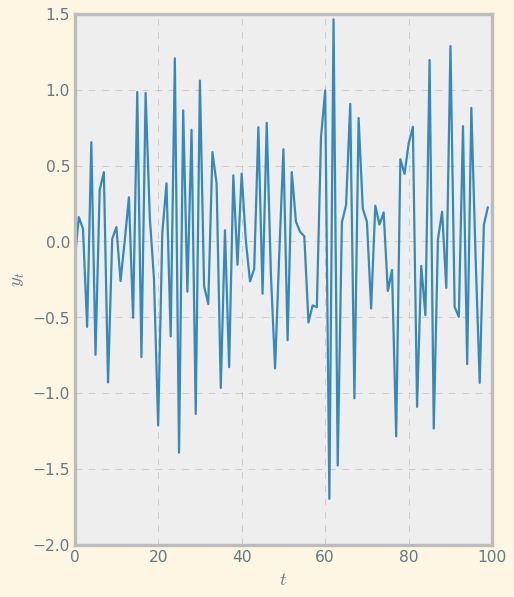

In [200]:
# simulatione example

# https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_process.arma_generate_sample.html

# Import data generation function and set random seed
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(41)

# Set ar_coefs and ma_coefs for an MA(1) model with MA lag -1 coefficient of -0.8
ar_coefs = [1] # Remember to set the lag-0 coefficients to 1.
ma_coefs = [1, -0.8] # Remember to set the lag-0 coefficients to 1.

# Generate data, scale is the standard deviation of the errors
data = arma_generate_sample(ar_coefs, ma_coefs, nsample = 100, scale = 0.5)

plt.plot(data)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

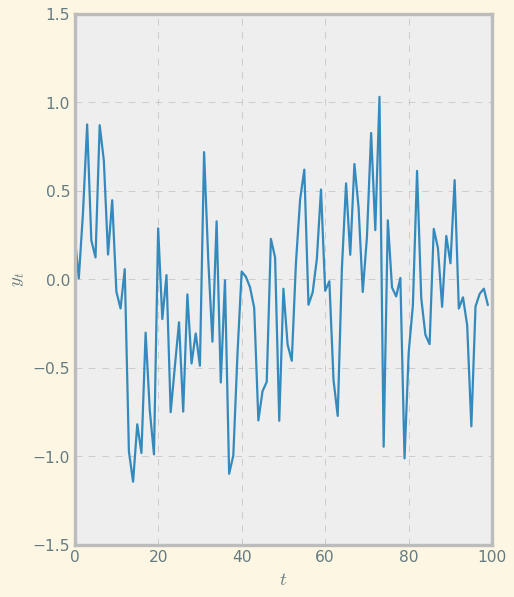

In [201]:
# AR(2) model is just an ARMA(2,0) model

# Import data generation function and set random seed
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(42)

# Set ar_coefs and ma_coefs for an AR(2) model with AR lag-1 and lag-2 coefficients of 0.3 and 0.2 respectively
ar_coefs = [1, -0.3, -0.2] # Remember to flip the sign of the coefficients.
ma_coefs = [1] # Remember to set the lag-0 coefficients to 1.

# Generate data, scale is the standard deviation of the errors
data = arma_generate_sample(ar_coefs, ma_coefs, nsample = 100, scale = 0.5)

plt.plot(data)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

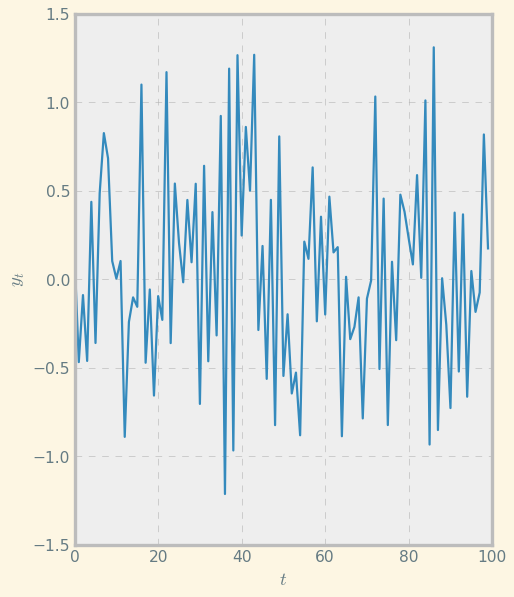

In [202]:
# Set the coefficients for a model with from yt = -0.3yt-1 + 0.2et-1 + 0.4et-2 + et.

# Import data generation function and set random seed.
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(43)

ar_coefs = [1, 0.3] # Remember for lags greater than 0, we need to flip the sign
ma_coefs = [1, 0.2, 0.4] # here we don't flip since these are coefficients of errors

# generate data
data = arma_generate_sample(ar_coefs, ma_coefs, nsample = 100, scale = 0.5)

plt.plot(data)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

### Estimating an AR Model

An autoregression model is a regression with a time series and itself, shifted by a time step or steps. These are called lags. I will demonstrate with five examples with the non-stationarized datasets so that you can see the results in the original dataset along with the forecasted dataset.

#### Example 1: Vacation dataset

In [203]:
from statsmodels.graphics.tsaplots import plot_acf
from pandas.plotting import lag_plot

df_v.head()

num_search_vacation  first_diff  second_diff
month                                                   
2004-04-01                   77        -7.0        -11.0
2004-05-01                   85         8.0          1.0
2004-06-01                   94         9.0         17.0
2004-07-01                   93        -1.0          8.0
2004-08-01                   76       -17.0        -18.0

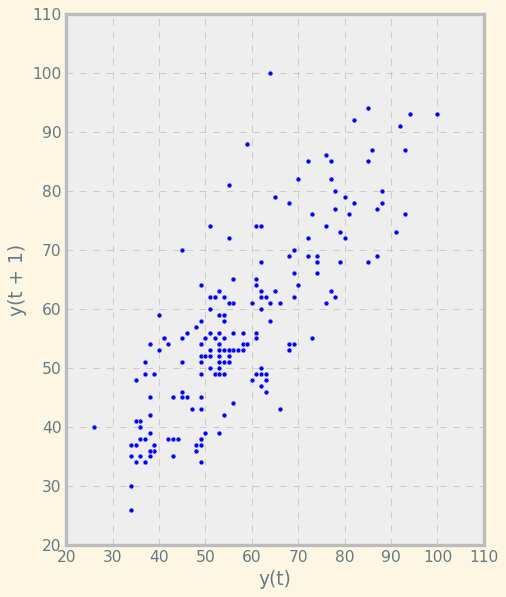

In [204]:
# Plot the time series against its lag
lag_plot(df_v['num_search_vacation'])
plt.show()

In [205]:
# Find the correlation of the time series with its lag
values = pd.DataFrame(df_v['num_search_vacation'].values)
dataframe = pd.concat([values.shift(1),values], axis = 1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.793214
t+1  0.793214  1.000000


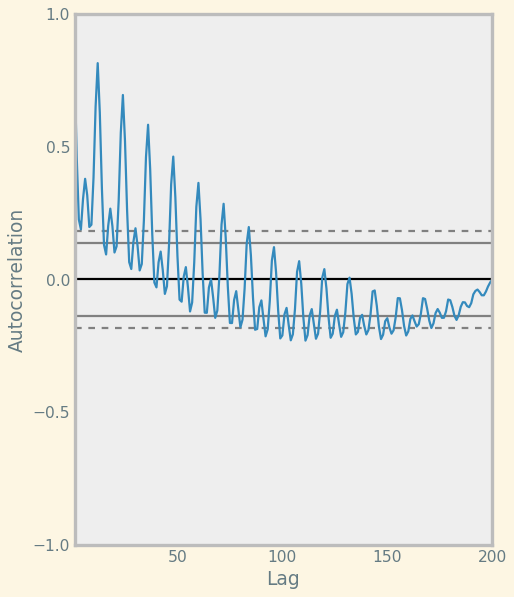

In [206]:
# Plot the autocorrelation of the dataset
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df_v['num_search_vacation'])
plt.show()

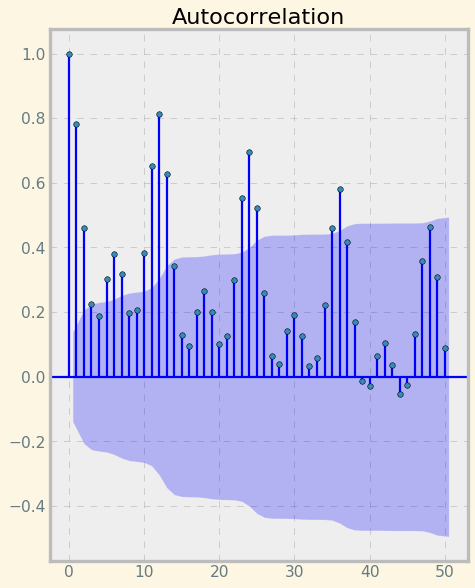

In [207]:
# Plot the autocorrelation function
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df_v['num_search_vacation'], lags = 50);
plt.show()

In [208]:
# Estimate the AR(1) model

# import the ARMA module from statsmodals
from statsmodels.tsa.arima_model import ARMA

# Fit an AR(1) model to the first simulated data
mod = ARMA(df_v['num_search_vacation'], order = (1,0)) # fit data to AR(1) model
res = mod.fit()

# Print result summary
print(res.summary())
# Print result parameters - are they close to true parameters?
print(res.params)

                               ARMA Model Results                              
Dep. Variable:     num_search_vacation   No. Observations:                  200
Model:                      ARMA(1, 0)   Log Likelihood                -727.988
Method:                        css-mle   S.D. of innovations              9.193
Date:                 Wed, 18 Nov 2020   AIC                           1461.976
Time:                         22:07:21   BIC                           1471.871
Sample:                     04-01-2004   HQIC                          1465.980
                          - 11-01-2020                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        57.1691      3.172     18.022      0.000      50.952      63.386
ar.L1.num_search_vacation     0.7990      0.043     18.538      0.000       0.

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be us

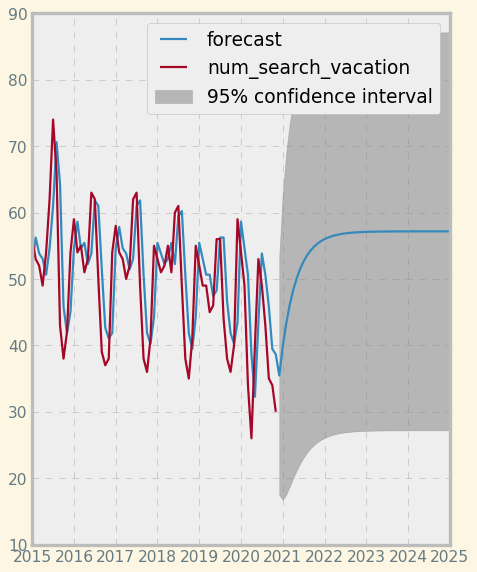

In [209]:
# Forecasting

res.plot_predict(start = '2015', end = '2025')
plt.show()

#### Example 2: Furniture dataset

In [210]:
df_f.head()

millions_of_dollars    cpi  cpi_sept20_rate  \
month                                                     
1992-02-01                 3908  138.6         0.532649   
1992-03-01                 4157  139.1         0.534570   
1992-04-01                 4141  139.4         0.535723   
1992-05-01                 4275  139.7         0.536876   
1992-06-01                 4357  140.1         0.538413   

            furniture_price_adjusted  furniture_pct_change  furniture_log  
month                                                                      
1992-02-01               2081.591336              0.018325       7.640888  
1992-03-01               2222.208686              0.067553       7.706257  
1992-04-01               2218.429801             -0.001701       7.704555  
1992-05-01               2295.145441              0.034581       7.738551  
1992-06-01               2345.866976              0.022099       7.760410

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

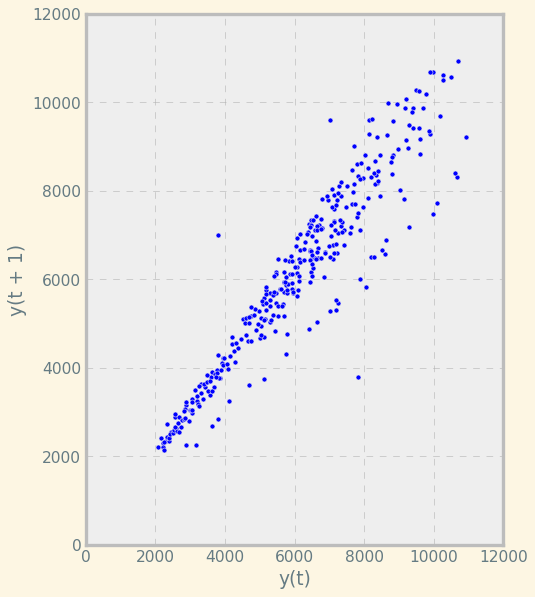

In [211]:
# Plot the timeseries against its lag
from pandas.plotting import lag_plot

lag_plot(df_f['furniture_price_adjusted'])

In [212]:
# Find the correlation of the time series with its lag

values = pd.DataFrame(df_f['furniture_price_adjusted'].values)
dataframe = pd.concat([values.shift(1), values], axis = 1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.943578
t+1  0.943578  1.000000


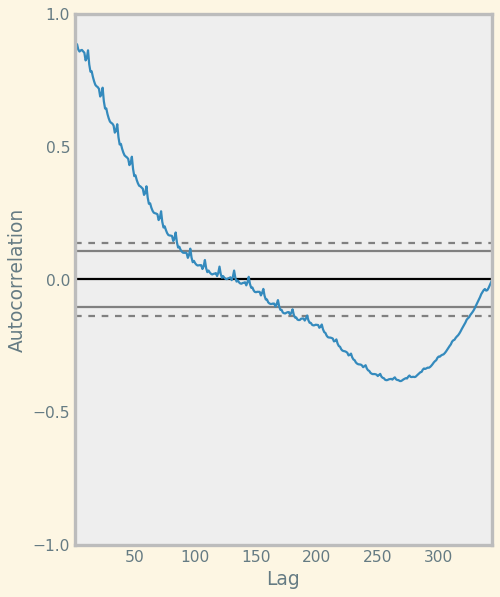

In [213]:
# Calculate the autocorrelation of the time series with its lag
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df_f['furniture_price_adjusted'])
plt.show()

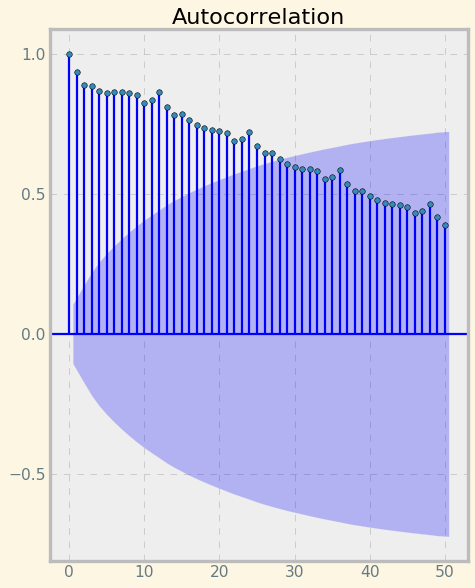

In [214]:
# Plot the autocorrelation function
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df_f['furniture_price_adjusted'], lags = 50);
plt.show()

In [215]:
# Estimate the AR(1) model
from statsmodels.tsa.arima_model import ARMA

mod = ARMA(df_f['furniture_price_adjusted'], order = (1,0))
res = mod.fit()

# print the result summary
print(res.summary())

# print the result parameter - are they similar to the original values?
print(res.params)

                                 ARMA Model Results                                 
Dep. Variable:     furniture_price_adjusted   No. Observations:                  344
Model:                           ARMA(1, 0)   Log Likelihood               -2748.133
Method:                             css-mle   S.D. of innovations            710.807
Date:                      Wed, 18 Nov 2020   AIC                           5502.267
Time:                              22:07:21   BIC                           5513.789
Sample:                          02-01-1992   HQIC                          5506.856
                               - 09-01-2020                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           6044.0885    745.504      8.107      0.000    4582.927    7505.250
ar.L1.furniture_price_a

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be us

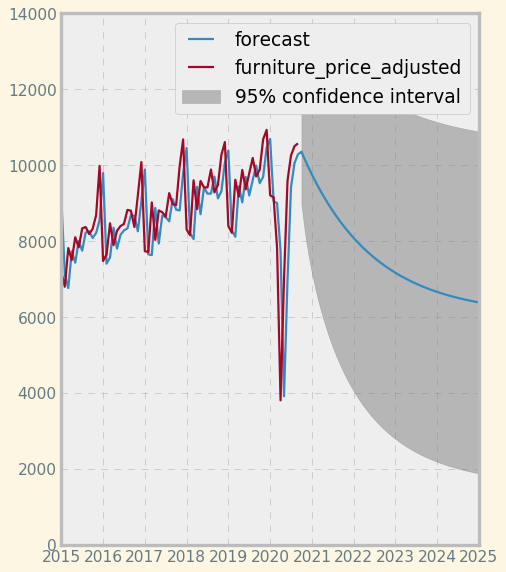

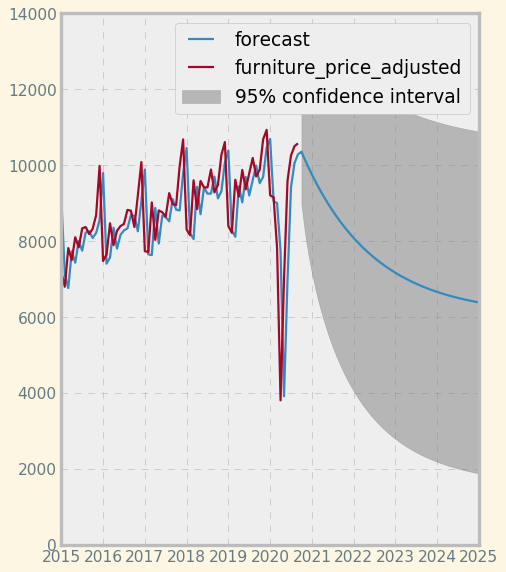

In [216]:
# Forecast

res.plot_predict(start = '2015', end = '2025')

#### Example 3: Bank of America dataset

In [217]:
df_bac = df_bac.resample(rule = 'M').last()

df_bac.head()

Adj Close  pct_change
Date                             
1990-01-31   4.055598   -0.028248
1990-02-28   4.149913   -0.016760
1990-03-31   3.684057   -0.043210
1990-04-30   3.541448    0.003367
1990-05-31   3.550491   -0.048532

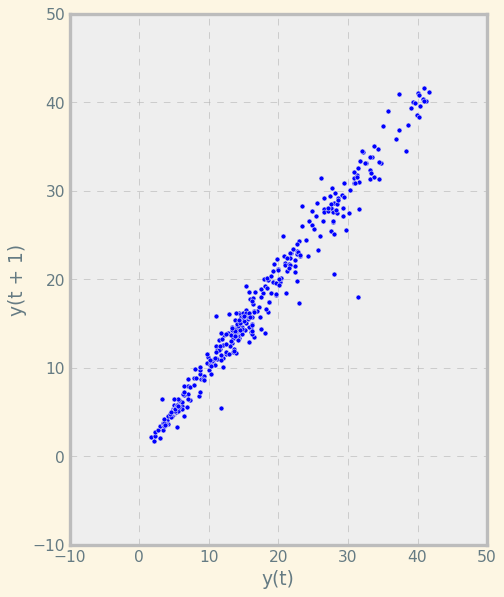

In [218]:
# plot the lag
from pandas.plotting import lag_plot

lag_plot(df_bac['Adj Close'])
plt.show()

In [219]:
# Calculate the correlation between the time series and its lag

values = pd.DataFrame(df_bac['Adj Close'].values)
dataframe = pd.concat([values.shift(1),values], axis = 1)
dataframe.columns = ['t-1','t+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.986841
t+1  0.986841  1.000000


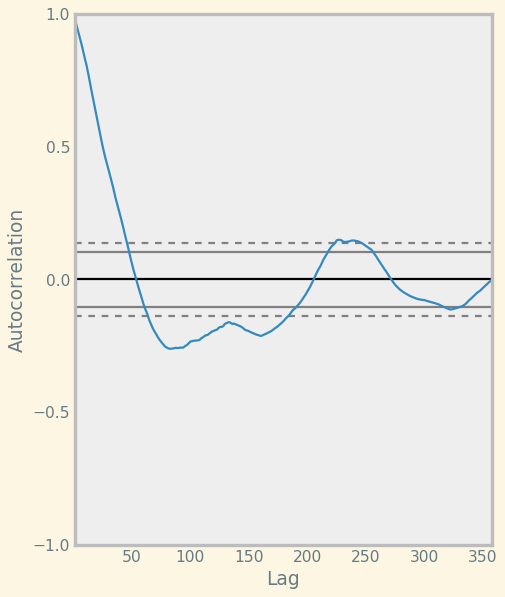

In [220]:
# Calculate the autocorrelation
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df_bac['Adj Close'])
plt.show()

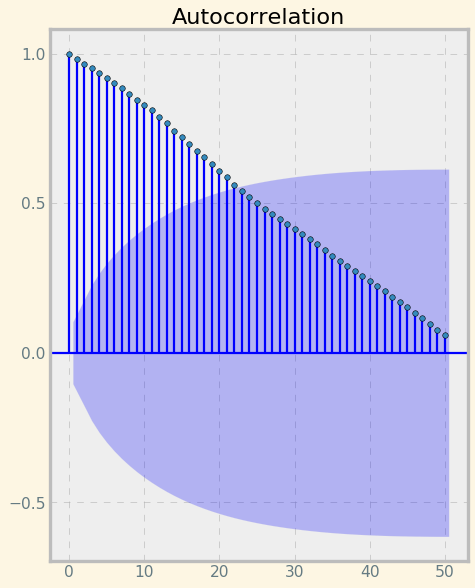

In [221]:
# Plot the autocorrelation function
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df_bac['Adj Close'], lags = 50);
plt.show()

In [222]:
# Estimate the AR(1) model
from statsmodels.tsa.arima_model import ARMA

mod = ARMA(df_bac['Adj Close'], order = (1,0))
res = mod.fit()

# print summary of result
print(res.summary())

# print parameters of the result
print(res.params)

                              ARMA Model Results                              
Dep. Variable:              Adj Close   No. Observations:                  358
Model:                     ARMA(1, 0)   Log Likelihood                -686.499
Method:                       css-mle   S.D. of innovations              1.638
Date:                Wed, 18 Nov 2020   AIC                           1378.998
Time:                        22:07:22   BIC                           1390.639
Sample:                    01-31-1990   HQIC                          1383.627
                         - 10-31-2019                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              16.8925      5.965      2.832      0.005       5.201      28.584
ar.L1.Adj Close     0.9880      0.008    128.868      0.000       0.973       1.003
                                

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


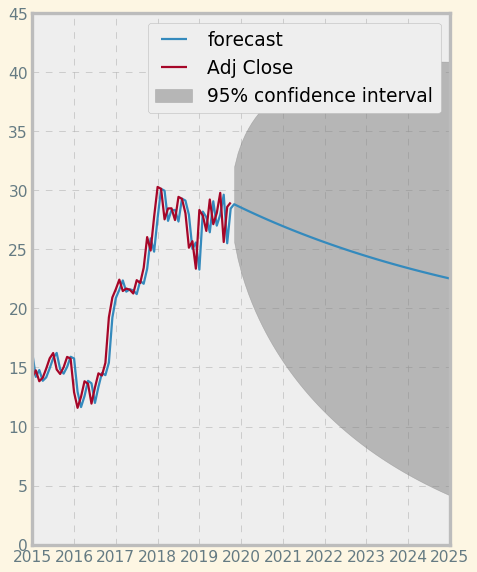

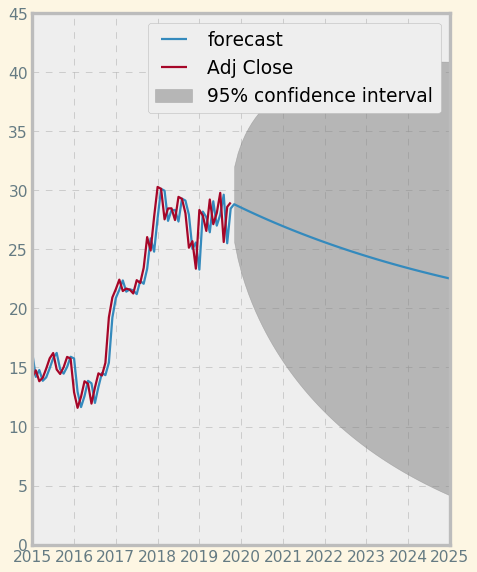

In [223]:
# Forecast

res.plot_predict(start = '2015', end = '2025')

### Estimating an MA Model

Moving Average model was described as a regression between a time series and its lagged error term. By specifying an order, we set the number of lags.

#### Example 1: Vacation dataset

In [224]:
df_v.head()

num_search_vacation  first_diff  second_diff
month                                                   
2004-04-01                   77        -7.0        -11.0
2004-05-01                   85         8.0          1.0
2004-06-01                   94         9.0         17.0
2004-07-01                   93        -1.0          8.0
2004-08-01                   76       -17.0        -18.0

In [225]:
# Estimate moving average

# Import ARMA
from statsmodels.tsa.arima_model import ARMA

mod = ARMA(df_v['num_search_vacation'], order = (0,1))
res = mod.fit()

print(res.summary())
print(res.params)

                               ARMA Model Results                              
Dep. Variable:     num_search_vacation   No. Observations:                  200
Model:                      ARMA(0, 1)   Log Likelihood                -749.363
Method:                        css-mle   S.D. of innovations             10.235
Date:                 Wed, 18 Nov 2020   AIC                           1504.726
Time:                         22:07:23   BIC                           1514.621
Sample:                     04-01-2004   HQIC                          1508.730
                          - 11-01-2020                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        57.2715      1.263     45.353      0.000      54.796      59.747
ma.L1.num_search_vacation     0.7486      0.033     22.880      0.000       0.

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be us

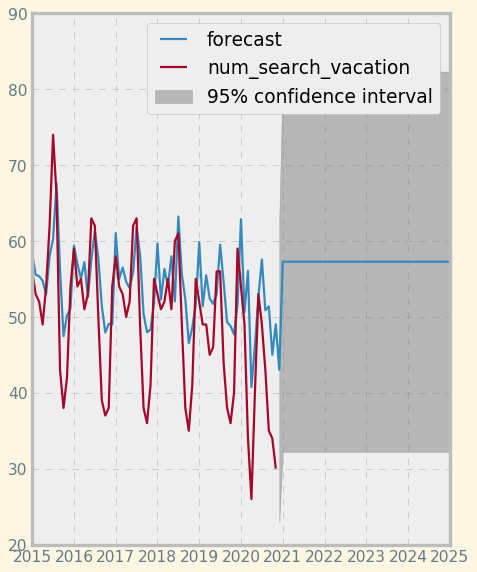

In [226]:
# Forecast

res.plot_predict(start = '2015', end = '2025')
plt.show()

#### Example 2: JP Morgan dataset

In [227]:
# convert from weekly to quartly
df_jpm = df_jpm.resample(rule = 'Q').last()
df_jpm.head()

Adj Close  pct_change
Date                             
1990-03-31   2.991435   -0.019513
1990-06-30   3.064886   -0.042858
1990-09-30   1.948704   -0.088235
1990-12-31   1.393528   -0.043956
1991-03-31   2.258246    0.130081

In [228]:
# Estimate
from statsmodels.tsa.arima_model import ARMA

mod = ARMA(df_jpm['Adj Close'], order = (0,1))
res = mod.fit()

print(res.summary())

print(res.params)

                              ARMA Model Results                              
Dep. Variable:              Adj Close   No. Observations:                  120
Model:                     ARMA(0, 1)   Log Likelihood                -497.318
Method:                       css-mle   S.D. of innovations             15.159
Date:                Wed, 18 Nov 2020   AIC                           1000.636
Time:                        22:07:23   BIC                           1008.999
Sample:                    03-31-1990   HQIC                          1004.033
                         - 12-31-2019                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              32.0513      2.614     12.262      0.000      26.928      37.174
ma.L1.Adj Close     0.8962      0.041     22.116      0.000       0.817       0.976
                                

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


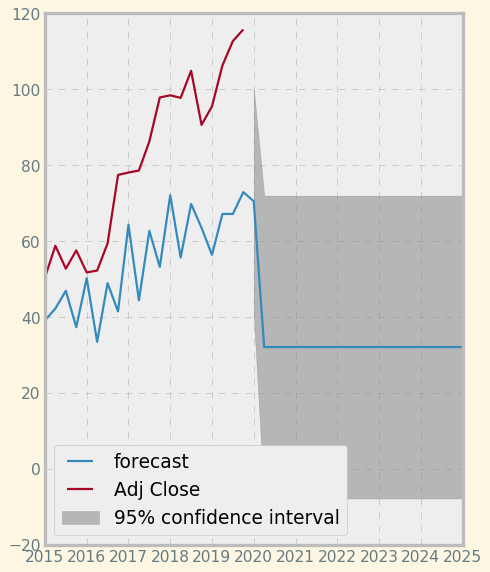

In [229]:
# Forecast

res.plot_predict(start = '2015', end = '2025');
plt.show()

#### Example 3: Temperature dataset

In [230]:
df_t.head()

avg_temp  anomaly  mean_diff
date                                    
1938-04-01      56.6      0.0   0.292268
1938-05-01      64.9     -1.4   8.592268
1938-06-01      73.5     -2.1  17.192268
1938-07-01      80.5      0.9  24.192268
1938-08-01      81.3      3.4  24.992268

In [231]:
# Estimate the moving average

mod = ARMA(df_t['avg_temp'], order = (0,1))
res = mod.fit()

print(res.summary())
print(res.params)

                              ARMA Model Results                              
Dep. Variable:               avg_temp   No. Observations:                  970
Model:                     ARMA(0, 1)   Log Likelihood               -3720.709
Method:                       css-mle   S.D. of innovations             11.205
Date:                Wed, 18 Nov 2020   AIC                           7447.419
Time:                        22:07:23   BIC                           7462.051
Sample:                    04-01-1938   HQIC                          7452.988
                         - 01-01-2019                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             56.2896      0.645     87.220      0.000      55.025      57.554
ma.L1.avg_temp     0.7947      0.014     55.291      0.000       0.767       0.823
                                    

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be us

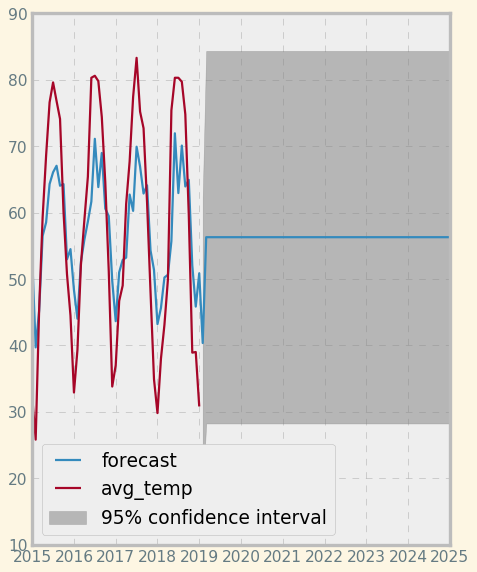

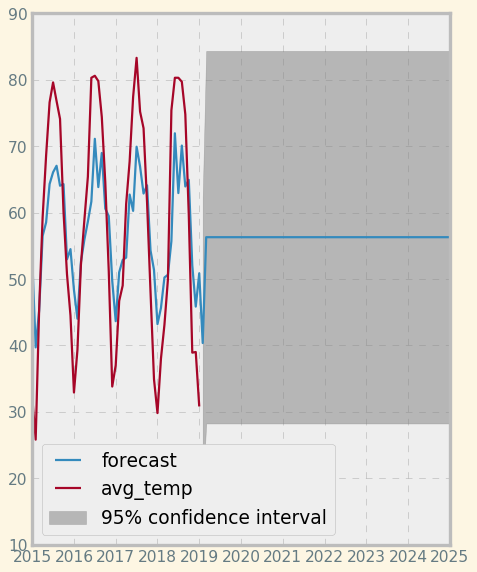

In [232]:
# Forecast the MA
res.plot_predict(start = '2015', end = '2025')

### Building an ARMA model

We will put autoregression and moving average models together in combination. AR(p) models try to explain the momentum and mean reversion effects. MA(q) models try to capture the shock effects observed in the white noise terms. These effects are unexpected or surprise events, hence anomalies.

#### Example 1: Vacation dataset

In [233]:
df_v.head()

num_search_vacation  first_diff  second_diff
month                                                   
2004-04-01                   77        -7.0        -11.0
2004-05-01                   85         8.0          1.0
2004-06-01                   94         9.0         17.0
2004-07-01                   93        -1.0          8.0
2004-08-01                   76       -17.0        -18.0

In [234]:
mod = ARMA(df_v['num_search_vacation'], order = (1,1))
res = mod.fit()

print(res.summary())

print(res.params)

                               ARMA Model Results                              
Dep. Variable:     num_search_vacation   No. Observations:                  200
Model:                      ARMA(1, 1)   Log Likelihood                -712.067
Method:                        css-mle   S.D. of innovations              8.483
Date:                 Wed, 18 Nov 2020   AIC                           1432.134
Time:                         22:07:24   BIC                           1445.327
Sample:                     04-01-2004   HQIC                          1437.473
                          - 11-01-2020                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        57.1793      2.587     22.103      0.000      52.109      62.250
ar.L1.num_search_vacation     0.6725      0.060     11.227      0.000       0.

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be us

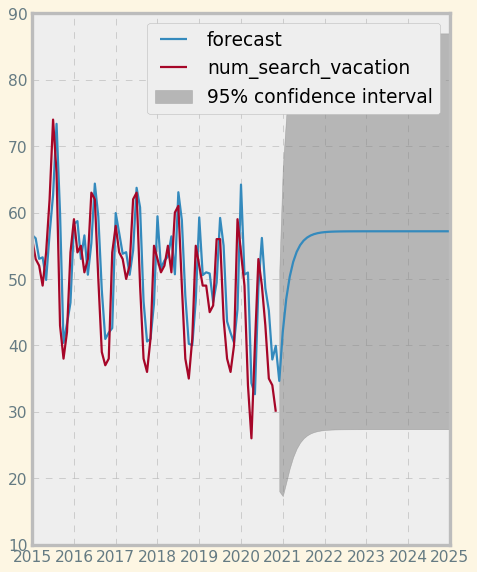

In [235]:
res.plot_predict(start = '2015', end = '2025');
plt.show()

#### Example 2: Furniture dataset

In [236]:
df_f.head()

millions_of_dollars    cpi  cpi_sept20_rate  \
month                                                     
1992-02-01                 3908  138.6         0.532649   
1992-03-01                 4157  139.1         0.534570   
1992-04-01                 4141  139.4         0.535723   
1992-05-01                 4275  139.7         0.536876   
1992-06-01                 4357  140.1         0.538413   

            furniture_price_adjusted  furniture_pct_change  furniture_log  
month                                                                      
1992-02-01               2081.591336              0.018325       7.640888  
1992-03-01               2222.208686              0.067553       7.706257  
1992-04-01               2218.429801             -0.001701       7.704555  
1992-05-01               2295.145441              0.034581       7.738551  
1992-06-01               2345.866976              0.022099       7.760410

In [237]:
mod = ARMA(df_f['furniture_price_adjusted'], order = (1,1))
res = mod.fit()

print(res.summary())
print(res.params)

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be us

                                 ARMA Model Results                                 
Dep. Variable:     furniture_price_adjusted   No. Observations:                  344
Model:                           ARMA(1, 1)   Log Likelihood               -2725.147
Method:                             css-mle   S.D. of innovations            663.395
Date:                      Wed, 18 Nov 2020   AIC                           5458.294
Time:                              22:07:24   BIC                           5473.657
Sample:                          02-01-1992   HQIC                          5464.413
                               - 09-01-2020                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           5906.2407   2798.634      2.110      0.035     421.019    1.14e+04
ar.L1.furniture_price_a

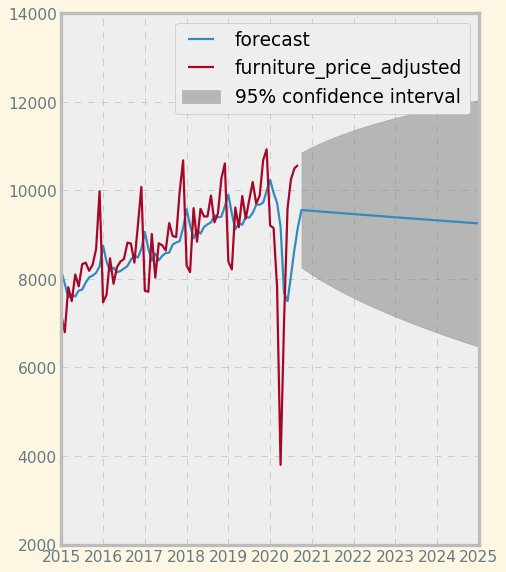

In [238]:
res.plot_predict(start = '2015', end = '2025');
plt.show()

#### Example 3: Bank of America dataset

In [239]:
df_bac.head()

Adj Close  pct_change
Date                             
1990-01-31   4.055598   -0.028248
1990-02-28   4.149913   -0.016760
1990-03-31   3.684057   -0.043210
1990-04-30   3.541448    0.003367
1990-05-31   3.550491   -0.048532

In [240]:
mod = ARMA(df_bac['Adj Close'], order = (1,1))
res = mod.fit()

print(res.summary())
print(res.params)

                              ARMA Model Results                              
Dep. Variable:              Adj Close   No. Observations:                  358
Model:                     ARMA(1, 1)   Log Likelihood                -686.476
Method:                       css-mle   S.D. of innovations              1.638
Date:                Wed, 18 Nov 2020   AIC                           1380.953
Time:                        22:07:25   BIC                           1396.475
Sample:                    01-31-1990   HQIC                          1387.126
                         - 10-31-2019                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              16.8891      6.021      2.805      0.005       5.088      28.690
ar.L1.Adj Close     0.9883      0.008    128.613      0.000       0.973       1.003
ma.L1.Adj Close    -0.0116      

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Here the `ma.L1.Adj Close` has a p value of 0.832 which is much higher than the threshold of 0.05. Therefore we fail to reject the null here.

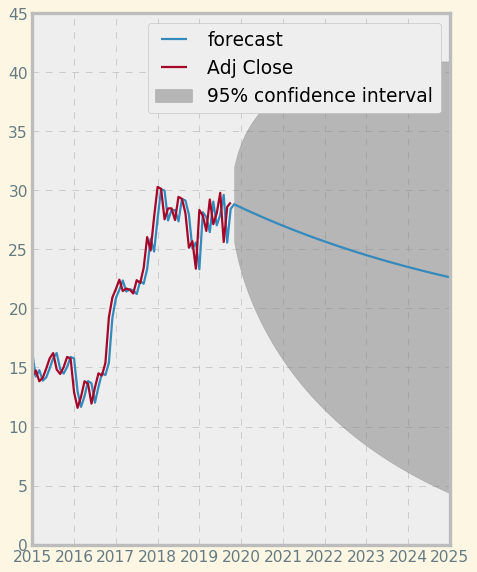

In [241]:
res.plot_predict(start = '2015', end = '2025');
plt.show()

#### Example 4: JP Morgan dataset

In [242]:
df_jpm.head()

Adj Close  pct_change
Date                             
1990-03-31   2.991435   -0.019513
1990-06-30   3.064886   -0.042858
1990-09-30   1.948704   -0.088235
1990-12-31   1.393528   -0.043956
1991-03-31   2.258246    0.130081

mod = ARMA(df_jpm['Adj Close'], order = (1,1))

res = mod.fit()

print(res.summary())

print(res.params)

_on running the above code we get the following error:_
ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

In [243]:
mod = ARMA(df_jpm['pct_change'], order = (1,1))

res = mod.fit()

print(res.summary())

print(res.params)

                              ARMA Model Results                              
Dep. Variable:             pct_change   No. Observations:                  120
Model:                     ARMA(1, 1)   Log Likelihood                 214.046
Method:                       css-mle   S.D. of innovations              0.040
Date:                Wed, 18 Nov 2020   AIC                           -420.092
Time:                        22:07:25   BIC                           -408.942
Sample:                    03-31-1990   HQIC                          -415.564
                         - 12-31-2019                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0001      0.001     -0.209      0.835      -0.001       0.001
ar.L1.pct_change     0.8412      0.052     16.075      0.000       0.739       0.944
ma.L1.pct_change    -1.0000 

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


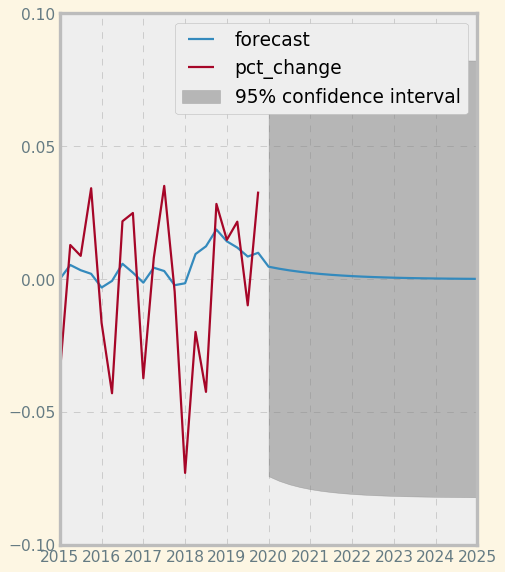

In [244]:
res.plot_predict(start = '2015', end = '2025');
plt.show()

This is a terrible forecast for the ARMA model

#### Example 5: Temperature dataset

In [245]:
df_t.head()

avg_temp  anomaly  mean_diff
date                                    
1938-04-01      56.6      0.0   0.292268
1938-05-01      64.9     -1.4   8.592268
1938-06-01      73.5     -2.1  17.192268
1938-07-01      80.5      0.9  24.192268
1938-08-01      81.3      3.4  24.992268

In [246]:
mod = ARMA(df_t['avg_temp'], order = (1,1))
res = mod.fit()

print(res.summary())
print(res.params)

                              ARMA Model Results                              
Dep. Variable:               avg_temp   No. Observations:                  970
Model:                     ARMA(1, 1)   Log Likelihood               -3433.445
Method:                       css-mle   S.D. of innovations              8.330
Date:                Wed, 18 Nov 2020   AIC                           6874.889
Time:                        22:07:25   BIC                           6894.398
Sample:                    04-01-1938   HQIC                          6882.315
                         - 01-01-2019                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             56.1939      1.581     35.546      0.000      53.095      59.292
ar.L1.avg_temp     0.7528      0.022     33.490      0.000       0.709       0.797
ma.L1.avg_temp     0.4662      0.024

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be us

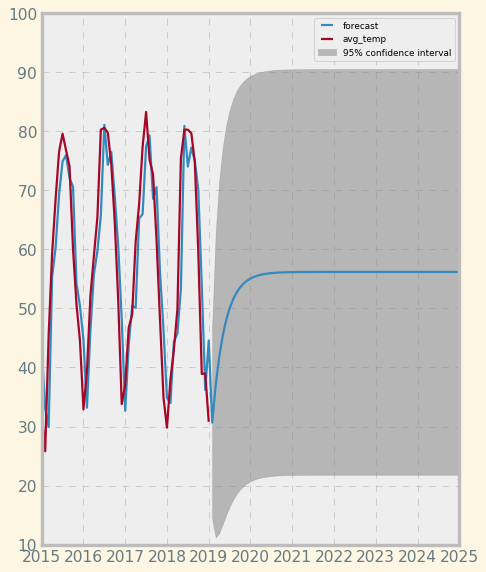

In [247]:
res.plot_predict(start = '2015', end = '2025')

plt.legend(fontsize = 8)
plt.show();

### Working with various ML  Models for the Time Series Analysis

#### Example 1: Vacation dataset

            num_search_vacation  first_diff  second_diff
month                                                   
2004-04-01                   77        -7.0        -11.0
2004-05-01                   85         8.0          1.0
2004-06-01                   94         9.0         17.0
2004-07-01                   93        -1.0          8.0
2004-08-01                   76       -17.0        -18.0


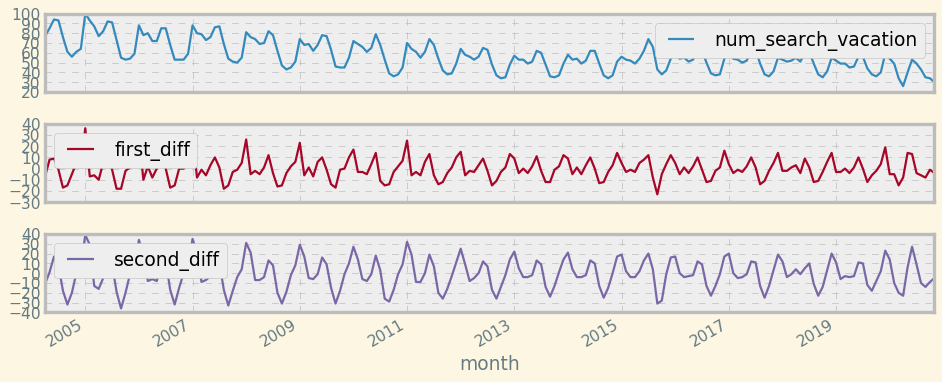

In [248]:
print(df_v.head())
df_v.plot(figsize = (12,5), subplots = True)
plt.tight_layout()
plt.show()

In [249]:
df_v.describe()

num_search_vacation  first_diff  second_diff
count           200.000000  200.000000   200.000000
mean             57.315000   -0.270000    -0.540000
std              15.132772    9.682762    15.334737
min              26.000000  -23.000000   -36.000000
25%              48.750000   -6.000000   -11.250000
50%              54.000000   -1.000000    -1.000000
75%              66.500000    5.000000    11.000000
max             100.000000   36.000000    39.000000

##### Kernel Density Plot

<AxesSubplot:ylabel='Density'>

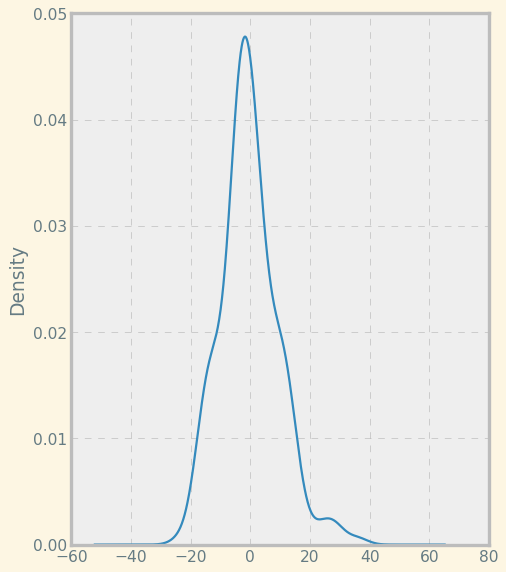

In [250]:
df_v['first_diff'].plot(kind = 'kde')

##### Autocorrelation plot

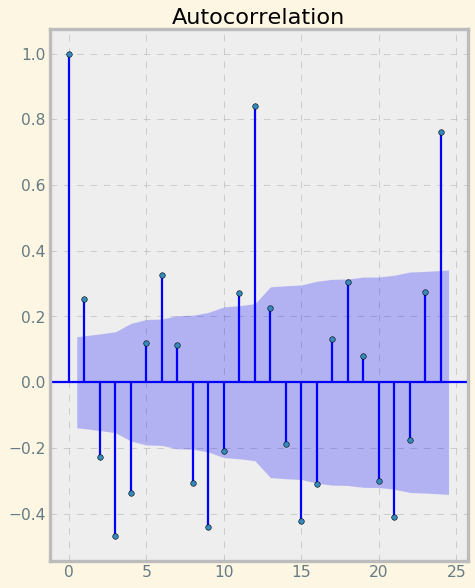

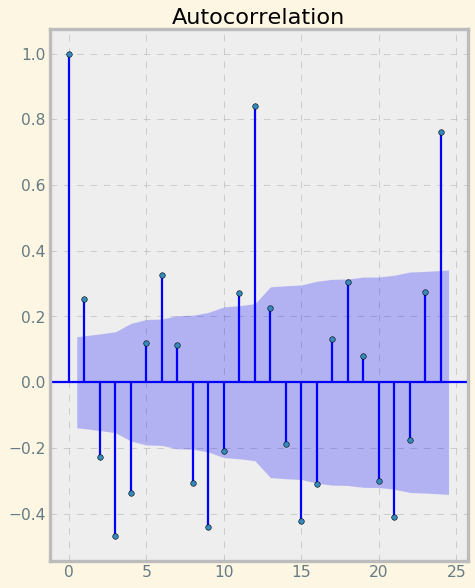

In [251]:
plot_acf(df_v['first_diff'])

##### Create lagged variables

In [260]:
df1 = pd.DataFrame()
print(df1)

Empty DataFrame
Columns: []
Index: []


In [261]:
# Create 12 months of lag values to predict current observations
# Shift 12 months:

for i in range(12,0,-1):
    df1['t-'+str(i)] = df_v['first_diff'].shift(i)
df1

t-12  t-11  t-10   t-9   t-8   t-7   t-6   t-5   t-4   t-3   t-2  \
month                                                                          
2004-04-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2004-05-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2004-06-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  -7.0   
2004-07-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  -7.0   8.0   
2004-08-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  -7.0   8.0   9.0   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2020-07-01   0.0 -12.0  -6.0  -2.0   4.0  19.0  -5.0  -5.0 -15.0  -8.0  14.0   
2020-08-01 -12.0  -6.0  -2.0   4.0  19.0  -5.0  -5.0 -15.0  -8.0  14.0  13.0   
2020-09-01  -6.0  -2.0   4.0  19.0  -5.0  -5.0 -15.0  -8.0  14.0  13.0  -4.0   
2020-10-01  -2.0   4.0  19.0  -5.0  -5.0 -15.0  -8.0  14.0  13.0  -4.0  -6.0   
2020-11-01   4.0  19.0  -5.0  -5.0 -15.0  -8.0  14.0  13.0  -4.0  -6.0  -8.0   

             t-1  
month             
2004-04-01   NaN  
2004-05-01  -7.0  
2004-06-01   8.0  
2004-07-01   9.0  
2004-08-01  -1.0  
...          ...  
2020-07-01  13.0  
2020-08-01  -4.0  
2020-09-01  -6.0  
2020-10-01  -8.0  
2020-11-01  -1.0  

[200 rows x 12 columns]

In [262]:
df1['t'] = df_v['first_diff'].values
df1 = df1[13:]
df1.head()

t-12  t-11  t-10   t-9   t-8   t-7   t-6   t-5   t-4   t-3   t-2  \
month                                                                          
2005-05-01   8.0   9.0  -1.0 -17.0 -15.0  -5.0   5.0   3.0  36.0  -7.0  -6.0   
2005-06-01   9.0  -1.0 -17.0 -15.0  -5.0   5.0   3.0  36.0  -7.0  -6.0 -10.0   
2005-07-01  -1.0 -17.0 -15.0  -5.0   5.0   3.0  36.0  -7.0  -6.0 -10.0   5.0   
2005-08-01 -17.0 -15.0  -5.0   5.0   3.0  36.0  -7.0  -6.0 -10.0   5.0  10.0   
2005-09-01 -15.0  -5.0   5.0   3.0  36.0  -7.0  -6.0 -10.0   5.0  10.0  -1.0   

             t-1     t  
month                   
2005-05-01 -10.0   5.0  
2005-06-01   5.0  10.0  
2005-07-01  10.0  -1.0  
2005-08-01  -1.0 -18.0  
2005-09-01 -18.0 -18.0

#### Example 2: Furniture dataset

In [263]:
df_f.head()

millions_of_dollars    cpi  cpi_sept20_rate  \
month                                                     
1992-02-01                 3908  138.6         0.532649   
1992-03-01                 4157  139.1         0.534570   
1992-04-01                 4141  139.4         0.535723   
1992-05-01                 4275  139.7         0.536876   
1992-06-01                 4357  140.1         0.538413   

            furniture_price_adjusted  furniture_pct_change  furniture_log  
month                                                                      
1992-02-01               2081.591336              0.018325       7.640888  
1992-03-01               2222.208686              0.067553       7.706257  
1992-04-01               2218.429801             -0.001701       7.704555  
1992-05-01               2295.145441              0.034581       7.738551  
1992-06-01               2345.866976              0.022099       7.760410

<AxesSubplot:xlabel='month'>

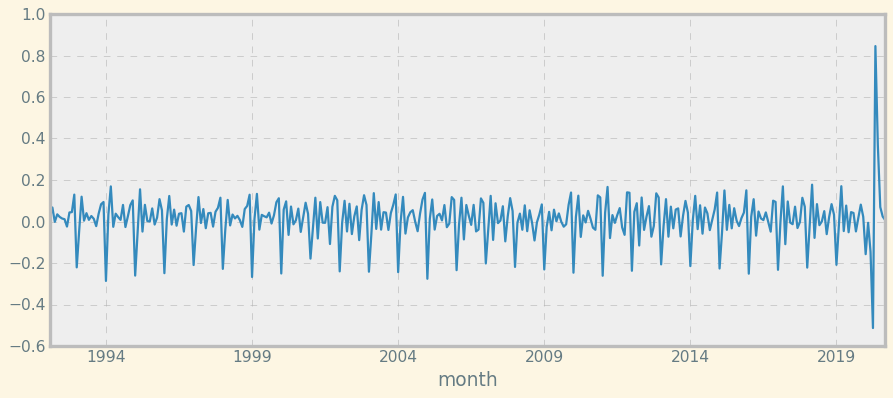

In [264]:
df_f['furniture_pct_change'].plot(figsize = (12,5))

##### Kernal Density Plot

<AxesSubplot:ylabel='Density'>

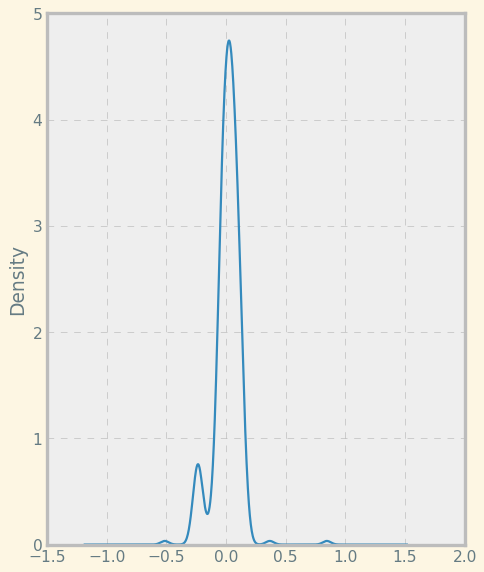

In [265]:
df_f['furniture_pct_change'].plot(kind = 'density')

##### Autocorrelation plot

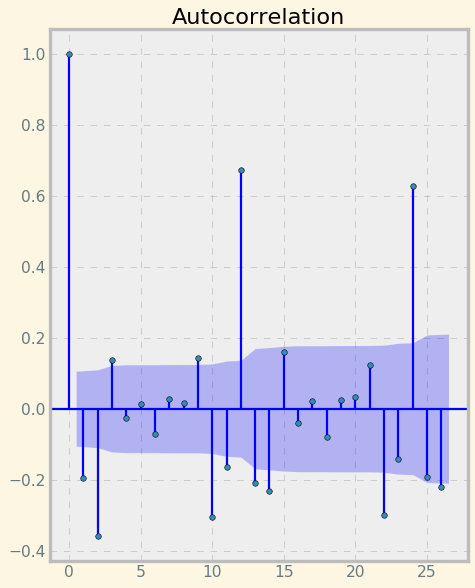

In [ ]:
plot_acf(df_f['furniture_pct_change'])